In [1]:

# NN maths simple example

import numpy as np


ninputs = 64
noutputs = 2
nhidden0 = 8

ainputs = np.random.random((ninputs,))
bhidden0 = np.array((nhidden0,))
coutputs = np.array((noutputs,))

winphidden0 = np.zeros((ninputs, nhidden0))
whidden0out = np.zeros((nhidden0, noutputs))

winphidden0idt = np.identity(nhidden0, like=winphidden0)
whidden0outidt = np.identity(nhidden0, like=whidden0out)

winphidden0idt

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

NN basics
Let's sketch out the math for a simple one-layer neural network, covering the feedforward pass, loss calculation, and weight updates.
1. The Neuron
At the heart of a neural network is the neuron. For a single-layer network, we often talk about a perceptron-like structure.
Inputs: Let's say we have $n$ input features, denoted as $x_1, x_2, ..., x_n$. We can represent this as an input vector $\mathbf{x} = [x_1, x_2, ..., x_n]^T$.
Weights: Each input is associated with a weight, $w_1, w_2, ..., w_n$. These are also grouped into a weight vector $\mathbf{w} = [w_1, w_2, ..., w_n]^T$.
Bias: A bias term, $b$, is added to the weighted sum.
Weighted Sum (Z): The first step is to calculate the weighted sum of inputs plus the bias:
$Z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$
In vector form, this is:
$Z = \mathbf{w}^T\mathbf{x} + b$
Activation Function: The weighted sum $Z$ is then passed through an activation function, $f$, to produce the neuron's output, $a$. For a single-layer network, this output is often our prediction.
$a = f(Z)$
Common activation functions include:
Sigmoid: $f(Z) = \frac{1}{1 + e^{-Z}}$ (outputs between 0 and 1, good for binary classification)
ReLU: $f(Z) = \max(0, Z)$ (simple and effective)
Linear: $f(Z) = Z$ (for regression tasks)
Let's use the sigmoid for a binary classification example.
2. Feedforward Pass (Prediction)
Given an input $\mathbf{x}$, the feedforward pass calculates the predicted output:
Calculate the weighted sum:
$Z = \mathbf{w}^T\mathbf{x} + b$
Apply the activation function (e.g., sigmoid):
$\hat{y} = \sigma(Z) = \frac{1}{1 + e^{-Z}}$
Here, $\hat{y}$ is our predicted output.
Here's a visual representation of this single neuron:

3. Loss Function
After making a prediction $\hat{y}$, we need to compare it to the true label $y$ to quantify how "wrong" our prediction was. This is done using a loss function (or cost function).
For binary classification with a sigmoid output, a common choice is the Binary Cross-Entropy Loss:
$L(\hat{y}, y) = - [y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]$
Our goal is to minimize this loss.
4. Backpropagation (Calculating Gradients)
To minimize the loss, we need to adjust the weights and bias. We do this using an optimization algorithm like gradient descent, which requires us to calculate the partial derivatives of the loss with respect to each weight and the bias ($\frac{\partial L}{\partial w_i}$ and $\frac{\partial L}{\partial b}$).
Let's break this down using the chain rule:
Derivative of Loss with respect to $\hat{y}$:
$\frac{\partial L}{\partial \hat{y}} = - \left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right) = \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})}$
Derivative of $\hat{y}$ with respect to $Z$ (for sigmoid):
$\frac{\partial \hat{y}}{\partial Z} = \frac{\partial}{\partial Z} \left( \frac{1}{1 + e^{-Z}} \right) = \frac{e^{-Z}}{(1 + e^{-Z})^2} = \hat{y}(1 - \hat{y})$
Derivative of Loss with respect to $Z$:
Using the chain rule: $\frac{\partial L}{\partial Z} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial Z}$
Substitute the above derivatives:
$\frac{\partial L}{\partial Z} = \left( \frac{\hat{y} - y}{\hat{y}(1 - \hat{y})} \right) \cdot (\hat{y}(1 - \hat{y})) = \hat{y} - y$
This is a remarkably simple and elegant result for binary cross-entropy with sigmoid!
Derivative of $Z$ with respect to $w_i$:
Recall $Z = w_1x_1 + ... + w_nx_n + b$.
$\frac{\partial Z}{\partial w_i} = x_i$
Derivative of $Z$ with respect to $b$:
$\frac{\partial Z}{\partial b} = 1$
Finally, the gradients for weights and bias:
Using the chain rule again:
$\frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial w_i} = (\hat{y} - y)x_i$
$\frac{\partial L}{\partial b} = \frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial b} = (\hat{y} - y) \cdot 1 = \hat{y} - y$
5. Weight Updates (Gradient Descent)
Now that we have the gradients, we can update the weights and bias to move in the direction that minimizes the loss. This is done iteratively using a learning rate, $\alpha$.
Update Rule for Weights:
$w_i \leftarrow w_i - \alpha \frac{\partial L}{\partial w_i}$
$w_i \leftarrow w_i - \alpha (\hat{y} - y)x_i$
Update Rule for Bias:
$b \leftarrow b - \alpha \frac{\partial L}{\partial b}$
$b \leftarrow b - \alpha (\hat{y} - y)$
These updates are typically performed for each training example (Stochastic Gradient Descent) or for batches of examples (Mini-Batch Gradient Descent). The process of feedforward, loss calculation, backpropagation, and weight updates is repeated for many epochs until the network learns to make accurate predictions.


# Positional Encoding and Attention

Need to inform the model about the position of the data point to establish an order (and distances between) of data points.

**Normalize position indices**
-> generates values larger than 1 for longer sequences (and they might be longer than training data) and the same position gets different addresses depending on the sequence length

**Module and then normalize**
-> solves the first two problems but position values are no longer unique

**Use a vector for positions**
-> e.g. a vector of 3 for three different sequences with different lengths, each modulo to its length and normalized - but distances are not the same for the same index position differences



In [35]:
import numpy as np

positionvector = np.array([[(i%4)/4 for i in range(7)], [(i%5)/5 for i in range(7)], [(i%7)/7 for i in range(7)]])

print(positionvector, positionvector.T[1])

def distance(pos0, pos1):
    return np.sqrt(np.dot((pos1 - pos0).T, (pos1 - pos0)))

print(f"distance 3 to 4: {distance(positionvector.T[3], positionvector.T[4]):3.2}")
print(f"distance 3 to 2: {distance(positionvector.T[3], positionvector.T[2]):3.2}")

[[0.         0.25       0.5        0.75       0.         0.25
  0.5       ]
 [0.         0.2        0.4        0.6        0.8        0.
  0.2       ]
 [0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
  0.85714286]] [0.25       0.2        0.14285714]
distance 3 to 4: 0.79
distance 3 to 2: 0.35


Try **360 degree cyclical module**: The encoded distances should be the same for all the positions t steps apart (Euclidean distance used): from the paper: *We chose this function because we hypothesized it would allow the model to easily learn to attend by relative positions, since for any fixed offset k, PEpos+k can be represented as a linear function of PEpos.* plus it is symmetrical and decays with longer step distances t. For proof see https://kazemnejad.com/blog/transformer_architecture_positional_encoding/ 

In [43]:
import numpy as np

positionvector = np.array([[i*360/4 for i in range(7)], [i*360/5 for i in range(7)], [i*360/7 for i in range(7)]])

print(positionvector, positionvector.T[1])

def distance(pos0, pos1):
    return np.sqrt(np.dot((pos1 - pos0).T, (pos1 - pos0)))

print(f"distance 3 to 4: {distance(positionvector.T[3], positionvector.T[4]):4.3}")
print(f"distance 3 to 2: {distance(positionvector.T[3], positionvector.T[2]):4.3}")

[[  0.          90.         180.         270.         360.
  450.         540.        ]
 [  0.          72.         144.         216.         288.
  360.         432.        ]
 [  0.          51.42857143 102.85714286 154.28571429 205.71428571
  257.14285714 308.57142857]] [90.         72.         51.42857143]
distance 3 to 4: 1.26e+02
distance 3 to 2: 1.26e+02


Now take sine, cos:

In [53]:
import numpy as np

positionvector = np.array([[i*360/4 for i in range(7)], [i*360/5 for i in range(7)], [i*360/7 for i in range(7)]])

print(positionvector, positionvector.T[1])

def sincospvec(pvec):
    return np.array([np.sin(pvec[0]), np.cos(pvec[0]), np.sin(pvec[1]), np.cos(pvec[1]), np.sin(pvec[2]), np.cos(pvec[2])])

def distance(pos0, pos1):
    return np.sqrt(np.dot((pos1 - pos0).T, (pos1 - pos0)))

positionvector = sincospvec(positionvector)

print(f"distance 3 to 4: {distance(positionvector.T[3], positionvector.T[4]):4.3}")
print(f"distance 3 to 2: {distance(positionvector.T[3], positionvector.T[2]):4.3}")

[[  0.          90.         180.         270.         360.
  450.         540.        ]
 [  0.          72.         144.         216.         288.
  360.         432.        ]
 [  0.          51.42857143 102.85714286 154.28571429 205.71428571
  257.14285714 308.57142857]] [90.         72.         51.42857143]
distance 3 to 4: 2.84
distance 3 to 2: 2.84


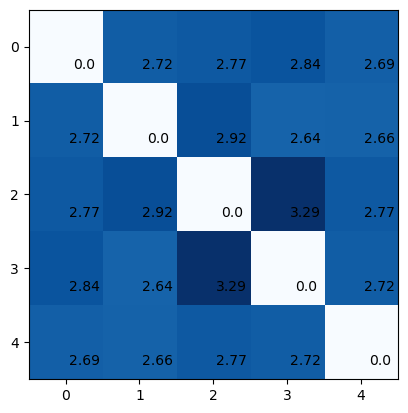

In [68]:
import matplotlib.pyplot as plt
import numpy as np

distances = np.zeros((5, 5))

for i, v1 in enumerate(positionvector[:5]):
    for j, v2 in enumerate(positionvector[:5]):
        distances[i, j] = np.linalg.norm(v1 - v2)

for i in range(5):
    for j in range(5):
        plt.annotate(str(round(distances[i][j], 2)),
                     xy=(j + 0.25, i + 0.25), ha='center', va='center', color='black')
    
plt.imshow(distances, cmap='Blues', interpolation='nearest')
plt.show()

use different angular speeds: choose dimensions, then the corresponding speeds:
e.g. $$\frac1{10000^{\frac{2d}{d_{model}}}}$$

In [93]:

dmodel = 4

def angularspeed(nencoding, dmodel):
    return np.exp(np.array(list(range(nencoding))) * -np.log(10000.0) / dmodel)

position = 2

encoding = np.sin(angularspeed(3, dmodel) * position)

encoding

array([0.90929743, 0.19866933, 0.01999867])

distance 3 to 4: 0.0026
distance 3 to 2: 0.017


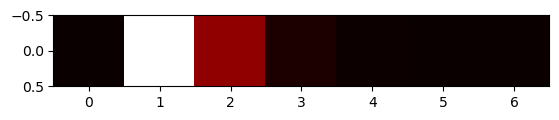

In [94]:
import numpy as np
import matplotlib.pyplot as plt


def angularspeed(pvec, nencoding, dmodel):
    return np.exp(pvec * -np.log(10000.0) / dmodel)

def sincospvec(pvec, nencoding, dmodel):
    return np.sin(angularspeed(pvec, nencoding, dmodel) * pvec)

def distance(pos0, pos1):
    return np.sqrt(np.dot((pos1 - pos0).T, (pos1 - pos0)))


positionvector = sincospvec(np.array(list(range(7))), 3, 4)

print(f"distance 3 to 4: {distance(positionvector.T[3], positionvector.T[4]):4.3}")
print(f"distance 3 to 2: {distance(positionvector.T[3], positionvector.T[2]):4.3}")

plt.imshow(positionvector * np.array([[1]]), cmap='hot', interpolation='nearest')
plt.show()

Now multiply by the squareroot of the model dimension: this reverses standardization in a way and prevents the positional encoding from drowning out the original data (if the PE values and the original data values are close the data might get muddled in PE): $$\sqrt{d_{model}}$$

In [96]:
print(f"pre: {positionvector} post: {positionvector * np.sqrt(dmodel)}")

pre: [0.00000000e+00 9.98334166e-02 1.99986667e-02 2.99999550e-03
 3.99999989e-04 5.00000000e-05 6.00000000e-06] post: [0.00000000e+00 1.99666833e-01 3.99973334e-02 5.99999100e-03
 7.99999979e-04 1.00000000e-04 1.20000000e-05]


## How is the data now encoded with PE?

encoded_x = x * np.sqrt(dmodel) + positionalencoding(x)

So the positional encoding information overlays the raw data, similar to a signal overlay over a power cable.

distance 3 to 4: 0.0026
distance 3 to 2: 0.017


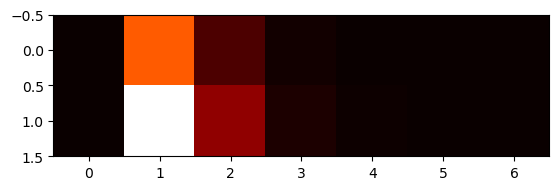

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def angularspeed(pvec, nencoding, dmodel):
    return np.exp(pvec * -np.log(10000.0) / dmodel)

def sincospvec(pvec, nencoding, dmodel):
    return np.sin(angularspeed(pvec, nencoding, dmodel) * pvec)

def distance(pos0, pos1):
    return np.sqrt(np.dot((pos1 - pos0).T, (pos1 - pos0)))


positionvector = sincospvec(np.array(list(range(7))), 3, 4)

print(f"distance 3 to 4: {distance(positionvector.T[3], positionvector.T[4]):4.3}")
print(f"distance 3 to 2: {distance(positionvector.T[3], positionvector.T[2]):4.3}")

#plt.imshow(positionvector * np.array([[1]]), cmap='hot', interpolation='nearest')
#plt.show()

positionvector_s = positionvector * np.sqrt(4)

plt.imshow(positionvector * np.array([[1]]) * np.array([[1], [0]]) + positionvector_s * np.array([[1]] * np.array([[0], [1]])), cmap='hot', interpolation='nearest')
plt.show()

### Note: dimensional correction via sqrt(dmodel)

weights of the model mostly between -1 and 1 (normalization and activation function)
"surface area of the model" = dmodel-cube(sides -1 to +1) = 2**dmodel
$$"surface area of the model" = dmodel-cube(sides -1 to +1) = 2^{d_{model}}$$

need to correct PE with a function growing proportional to the model surface area

In [3]:

import time

print('.', end='\r')

time.sleep(1.5)

print('+', end='\r')
print()
   

+


In [39]:

import random
import time

guessthis = [str(random.randint(0, 9)) for i in range(6)]

time.sleep(0.8)
for el in guessthis:
    print(el, end='\r')
    time.sleep(1.2)
    print(' ', end='\r')
    time.sleep(0.2)
    
print()

guessednumber = input("Enter the number: ")

if guessednumber == ''.join(guessthis):
    print('correct')
else:
    print('incorrect', ''.join(guessthis))
    

Enter the number:  648024


correct


In [2]:
import random
import time

lenguess = 6

guessthis = [str(random.randint(0, 9)) for i in range(lenguess)]

time.sleep(0.8)
for el in guessthis:
    print(el, end='\r')
    time.sleep(1.2)
    print(' ', end='\r')
    time.sleep(0.2)
    
print()

modifier = random.randint(1, 9)
idxmodifier = random.randint(0, lenguess-1)

print(f"Add {modifier} to the {idxmodifier+1}. number.")
guessthis[idxmodifier] = str(int(guessthis[idxmodifier]) + modifier)

guessednumber = input("Enter the number: ")

if guessednumber == ''.join(guessthis):
    print('correct')
else:
    print('incorrect', ''.join(guessthis))
    

 
Add 1 to the 3. number.


Enter the number:  038134


correct


In [1]:
x = 1
eval('x + 1')

#eval('x')


2

In [2]:
import random

random.choice([1, 2, 3])

2

In [21]:
from numpy import exp, array, random, dot

training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

random.seed(1)

synaptic_weights = 2 * random.random((3, 1)) - 1

for iteration in range(1000):
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))  # quadratic loss
    
print(1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))))

[0.99929937]


In [314]:
from numpy import exp, array, random, dot

training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

#random.seed(1)

synaptic_weights = 2 * random.random((3, 1)) - 1

for iteration in range(10):
    output = 1 / (1 + exp(-(dot(training_set_inputs, synaptic_weights))))
    synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output))  # cross entropy loss
    
print(1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))))

[0.98404014]


In [188]:
from numpy import exp, array, random, dot

training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

t_input = array([0, 0, 1])
t_output = array([0])

random.seed(1)

synaptic_weights = 2 * random.random((3, 1)) - 1

for iteration in range(100):
    output = 1 / (1 + exp(-(dot(t_input, synaptic_weights))))
    synaptic_weights += dot(t_input.T, array([1, 1, 1]) * (t_output - output) * output * (1 - output))
    
print(1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))))

[0.16077543]


In [385]:
from numpy import exp, array, random, dot

training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

t_input = array([0, 0, 1])
t_output = array([0])

random.seed(1)

synaptic_weights = 2 * random.random((3, 1)) - 1

for iteration in range(100):
    output = 1 / (1 + exp(-(dot(t_input, synaptic_weights))))
    synaptic_weights += dot(t_input.T, array([1, 1, 1]) * (t_output - output))  # cross entropy loss
    
print(1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))))

[0.02232899]


$$c = \sqrt{a^2 + b^2}$$

In [395]:
from numpy import exp, array, random, dot, max

training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = array([[0, 1, 1, 0]]).T

etha = 1.
synaptic_weights = 2 * random.random((3, 1)) - 1  # 3 weights + bias

for iteration in range(100):
    tmpdot = 0
    i = random.randint(4)
    t_input = array([training_set_inputs[i]])
    t_output = training_set_outputs[i]
    tmpdot += (dot(t_input, synaptic_weights))
    output = 1 / (1 + exp(-tmpdot))
    synaptic_weights += etha * t_input.T * (t_output - output)  # cross entropy loss
    
for i in range(4):
    print(i, training_set_inputs[i], training_set_outputs[i], 1 / (1 + exp(-(dot(training_set_inputs[i], synaptic_weights)))))

print(1 / (1 + exp(-(dot(array([1, 0, 0]), synaptic_weights)))))

0 [0 0 1] [0] [0.05248225]
1 [1 1 1] [1] [0.94024712]
2 [1 0 1] [1] [0.95228751]
3 [0 1 1] [0] [0.04184173]
[0.99723251]


**Core Concepts Illustrated**

The code demonstrates the three fundamental steps of the attention mechanism:

**Similarity Scores (Dot Product)**: The np.dot(keys, query) step calculates how relevant each Key is to the Query. A larger dot product means greater similarity.

**Attention Weights (Softmax)**: The Softmax function $\left(\frac{e^{score_i}}{\sum_j e^{score_j}}\right)$ is applied to the raw scores. This step normalizes the scores into a probability distribution, ensuring all weights are between 0 and 1 and sum up to 1. These weights indicate how much to pay attention to each value.

**Context Vector (Weighted Sum)**: The final output is computed by multiplying each Value by its corresponding Weight and summing the results ($\sum_{i} W_i \cdot V_i$). The resulting Context Vector is a representation that captures the most relevant information from the Values, steered by the Query.

In [396]:
import numpy as np

def simple_attention(query, keys, values):
    """
    A simplified, illustrative example of the attention mechanism.

    Args:
        query (np.ndarray): The vector representing what we're looking for.
        keys (np.ndarray): A set of vectors to compare the query against.
        values (np.ndarray): The values associated with the keys.

    Returns:
        np.ndarray: The context vector (weighted sum of values).
    """
    # 1. Calculate Similarity Scores (e.g., Dot Product)
    # The dot product measures how related the query is to each key.
    # Scores shape will be (num_keys,)
    scores = np.dot(keys, query)

    # 2. Normalize Scores to get Attention Weights (using Softmax)
    # Softmax converts scores into probabilities (weights) that sum to 1.
    # The higher the score, the higher the weight.
    # Weights shape will be (num_keys,)
    # np.exp(scores - np.max(scores)) is used for numerical stability
    exp_scores = np.exp(scores - np.max(scores))
    weights = exp_scores / np.sum(exp_scores)

    # 3. Compute Context Vector (Weighted Sum of Values)
    # The final output (context vector) is the sum of (weight * value).
    # This vector represents the "attended" information.
    # values shape is (num_keys, value_dim), weights shape is (num_keys,)
    # This results in (value_dim,)
    context_vector = np.dot(weights, values)

    return context_vector, weights

# --- Example Usage ---

# Define the input data:
# Here, the dimension for Q, K, V is 4. We have 3 key-value pairs.
# Imagine Q is a word, and K/V are surrounding words.

# The Query (Q): What we are looking for (e.g., current word's embedding)
query = np.array([1.0, 0.5, 0.1, 0.0]) # Shape (4,)

# The Keys (K): What we compare against (e.g., other words' embeddings)
keys = np.array([
    [1.1, 0.4, 0.0, 0.1],  # Key 1: Very similar to Q
    [0.2, 0.8, 0.9, 0.7],  # Key 2: Less similar
    [0.9, 0.6, 0.1, 0.0]   # Key 3: Similar
]) # Shape (3, 4)

# The Values (V): The actual information to be aggregated
# (In self-attention, K and V are often the same, but they don't have to be)
values = np.array([
    [5.0, 5.0, 5.0, 5.0],  # Value 1 (High relevance expected)
    [1.0, 1.0, 1.0, 1.0],  # Value 2 (Low relevance expected)
    [3.0, 3.0, 3.0, 3.0]   # Value 3 (Medium relevance expected)
]) # Shape (3, 4)

# Run the attention mechanism
context_vector, weights = simple_attention(query, keys, values)

print("--- Simple Attention Example ---")
print(f"Query: {query}")
print("-" * 35)

print(f"Keys (K):\n{keys}")
print(f"Values (V):\n{values}")
print("-" * 35)

print(f"Attention Weights (W):\n{weights}")
# Expected: weights[0] and weights[2] should be high because Key 1 and Key 3 
# are more similar to the Query than Key 2.
print("-" * 35)

print(f"Context Vector (Output):\n{context_vector}")
# Expected: The output should be a blend of the values, dominated by Value 1 
# and Value 3 due to their higher weights.

--- Simple Attention Example ---
Query: [1.  0.5 0.1 0. ]
-----------------------------------
Keys (K):
[[1.1 0.4 0.  0.1]
 [0.2 0.8 0.9 0.7]
 [0.9 0.6 0.1 0. ]]
Values (V):
[[5. 5. 5. 5.]
 [1. 1. 1. 1.]
 [3. 3. 3. 3.]]
-----------------------------------
Attention Weights (W):
[0.40695369 0.22111864 0.37192767]
-----------------------------------
Context Vector (Output):
[3.3716701 3.3716701 3.3716701 3.3716701]


**Hierarchical Attention** is an extension of the standard attention mechanism used in deep learning, primarily designed to process information with an inherent, nested structure, such as documents, which are composed of sentences, which are in turn composed of words.

It works by applying the attention mechanism at multiple levels of granularity:

### 1. The Concept

Instead of calculating a single context vector for the entire input sequence, Hierarchical Attention applies attention sequentially:

1.  **Lower Level (e.g., Word-to-Sentence Attention):** It first processes the elements at the lowest level (e.g., words in a sentence) and computes an intermediate representation (e.g., a **sentence vector**) by selectively weighing the importance of individual words.
2.  **Higher Level (e.g., Sentence-to-Document Attention):** These intermediate representations (sentence vectors) are then processed at the higher level. The mechanism selectively weighs the importance of these elements (sentences) to form the final, high-level output (e.g., a **document vector** or final prediction).

This multi-layered approach allows the model to first figure out which **words are important within a sentence** and then figure out which **sentences are important within the document**, leading to more robust and context-aware representations.

***

### 2. Key References

The seminal work introducing and popularizing this specific architecture is:

* **Yang, Z., Yang, D., Cohen, S., Salakhutdinov, R., & Hovy, E. (2016). Hierarchical Attention Networks for Document Classification.** *Proceedings of the 2016 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies (NAACL).*
    * **Focus:** This paper introduced the **Hierarchical Attention Network (HAN)** model, specifically for document classification, which is the standard implementation of hierarchical attention.

Other related and foundational works on attention include:

* **Bahdanau, D., Cho, K., & Bengio, Y. (2014). Neural machine translation by jointly learning to align and translate.** *International Conference on Learning Representations (ICLR).*
    * **Focus:** The original introduction of the **attention mechanism** (additive attention) in the context of sequence-to-sequence models (Neural Machine Translation).

* **Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention Is All You Need.** *Advances in Neural Information Processing Systems (NeurIPS).*
    * **Focus:** Introduced the **Transformer** architecture and the **Self-Attention** (or scaled dot-product attention) mechanism, which underpins modern models and is often adapted for hierarchical applications.

💡 **BPE Overview**

Byte Pair Encoding is a subword tokenization technique used to balance between character-level and word-level models.

Goal: Efficiently handle a large vocabulary and the "out-of-vocabulary" (OOV) problem, especially common with large language models (LLMs).

Process:

* Start by treating every character as an initial token.

* Iteratively find the most frequent adjacent pair of tokens (which can be characters or already-merged subwords).

* Replace all occurrences of that pair with a new, single token.

* Repeat the process for a fixed number of merge operations or until no more frequent pairs exist.

The provided Python code illustrates these steps by tracking tokens as space-separated strings and using a Counter to find the most frequent pairs.

This video provides an excellent, detailed explanation of how Byte Pair Encoding works, which is highly relevant to understanding the code. Lecture 8: The GPT Tokenizer: Byte Pair Encoding

In [400]:
from collections import Counter

def get_pair_counts(tokens):
    """Count the frequency of adjacent pairs in a list of tokens."""
    counts = Counter()
    for word, freq in tokens.items():
        token_list = word.split(' ')
        for i in range(len(token_list) - 1):
            pair = (token_list[i], token_list[i+1])
            counts[pair] += freq
    return counts

def merge_pair(tokens, pair, new_token):
    """Replace all occurrences of a pair in the token list with a new token."""
    merged_tokens = {}
    bigram_str = ' '.join(pair)
    new_str = new_token
    
    for word, freq in tokens.items():
        # Replace the pair with the new token, maintaining token separation
        # using a simple string replacement on the space-separated tokens.
        new_word = word.replace(bigram_str, new_str)
        merged_tokens[new_word] = freq
    return merged_tokens

def train_bpe(corpus, num_merges):
    """Main BPE training function."""
    
    # 1. Initial Tokens: Split each word into characters and track word frequencies.
    # The dictionary keys represent space-separated tokens (e.g., "h e l l o"), 
    # and the values are the frequencies of the *words* in the corpus.
    tokens = Counter(corpus.split())
    tokens = {' '.join(list(k)) : v for k, v in tokens.items()}
    
    print("Initial Vocabulary:", sorted(list(set(' '.join(tokens.keys()).split(' ')))) )
    print("-" * 20)

    merges = {}
    for i in range(num_merges):
        # 2. Find the most frequent pair
        pair_counts = get_pair_counts(tokens)
        if not pair_counts:
            break
            
        # Get the most frequent pair
        best_pair = pair_counts.most_common(1)[0][0]
        
        # 3. Create a new token (merge)
        new_token = ''.join(best_pair)
        merges[best_pair] = new_token
        
        # 4. Apply the merge to the corpus
        tokens = merge_pair(tokens, best_pair, new_token)
        
        print(f"Merge {i+1}: Merged {best_pair} into '{new_token}'")
        print("Current Tokens (word: frequency):", tokens)
        print("Current Vocabulary:", sorted(list(set(' '.join(tokens.keys()).split(' ')))) )
        print("-" * 20)
        
    return merges

# --- Example Usage ---
corpus = "low lower newest newest newest wide wide"
num_merges = 5

print(f"Starting BPE training on: '{corpus}' for {num_merges} merges.\n")
learned_merges = train_bpe(corpus, num_merges)

print("Final Learned Merges:", learned_merges)

Starting BPE training on: 'low lower newest newest newest wide wide' for 5 merges.

Initial Vocabulary: ['d', 'e', 'i', 'l', 'n', 'o', 'r', 's', 't', 'w']
--------------------
Merge 1: Merged ('w', 'e') into 'we'
Current Tokens (word: frequency): {'l o w': 1, 'l o we r': 1, 'n e we s t': 3, 'w i d e': 2}
Current Vocabulary: ['d', 'e', 'i', 'l', 'n', 'o', 'r', 's', 't', 'w', 'we']
--------------------
Merge 2: Merged ('n', 'e') into 'ne'
Current Tokens (word: frequency): {'l o w': 1, 'l o we r': 1, 'ne we s t': 3, 'w i d e': 2}
Current Vocabulary: ['d', 'e', 'i', 'l', 'ne', 'o', 'r', 's', 't', 'w', 'we']
--------------------
Merge 3: Merged ('ne', 'we') into 'newe'
Current Tokens (word: frequency): {'l o w': 1, 'l o we r': 1, 'newe s t': 3, 'w i d e': 2}
Current Vocabulary: ['d', 'e', 'i', 'l', 'newe', 'o', 'r', 's', 't', 'w', 'we']
--------------------
Merge 4: Merged ('newe', 's') into 'newes'
Current Tokens (word: frequency): {'l o w': 1, 'l o we r': 1, 'newes t': 3, 'w i d e': 2}
Cu

the key question here is the **levels of attention and concepts**: byte pairs -> words -> sentences -> documents are obvious, but I think there is a concept layer between sentences and documents. How, then, about higher and more abstract concept layers? Can this be done dynamically? What is the separation criterion? I imagine someting like information gain as used as a split criterion in random trees.


The **Information Gain (IG)** criterion is a key metric used in training Decision Trees to decide which attribute (feature) to split the data on at each node. Its goal is to **maximize the purity of the resulting child nodes**, meaning the children should ideally **contain data points belonging to a single class**.

🌳 **Information Gain Explained**

Information Gain is calculated by finding the difference between the entropy of the parent node (before the split) and the weighted average of the entropy of the child nodes (after the split).$$IG(\text{S}, \text{A}) = \text{Entropy}(\text{S}) - \sum_{v \in \text{Values}(\text{A})} \frac{|\text{S}_v|}{|\text{S}|} \text{Entropy}(\text{S}_v)$$Where:
$S$ is the set of data at the parent node.
$A$ is the attribute being considered for the split.
$\text{Values}(A)$ is the set of possible values for attribute $A$.$S_v$ is the subset of $S$ where attribute $A$ has value $v$.$|S|$ and
$|S_v|$ are the number of elements in the respective sets.

Entropy ($\text{Entropy}(S)$): This is a measure of the impurity or randomness in the data. **Low entropy means the data is mostly of one class (pure)**, and high entropy means the classes are mixed (impure). The goal of a split is to reduce this value. $$\text{Entropy}(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)$$ Where $c$ is the number of classes, and $p_i$ is the proportion of samples belonging to class $i$.

**Information Gain**: The split that results in the highest Information Gain is chosen because it is the most effective at reducing impurity and making the resulting subsets (children) purer.

In [2]:
import numpy as np

# 1. Define Entropy Function
def calculate_entropy(class_counts):
    """Calculates entropy given a list of class counts."""
    total_samples = sum(class_counts)
    if total_samples == 0:
        return 0
    entropy = 0
    for count in class_counts:
        # p_i is the proportion of the class
        p_i = count / total_samples
        if p_i > 0:
            # - p_i * log2(p_i)
            entropy -= p_i * np.log2(p_i)
    return entropy

# 2. Sample Data (Parent Node)
# The data has two classes: [Class A, Class B]
parent_counts = [5, 5]  # 5 A's and 5 B's (Total 10)
entropy_parent = calculate_entropy(parent_counts)
# Entropy here will be 1.0 (maximum impurity)

# 3. Define a Hypothetical Split (Feature 'Color' with values 'Red' and 'Blue')
# Split 1 (Red): [4 A's, 1 B] -> 5 samples
split_red_counts = [4, 1]
entropy_red = calculate_entropy(split_red_counts)

# Split 2 (Blue): [1 A, 4 B's] -> 5 samples
split_blue_counts = [1, 4]
entropy_blue = calculate_entropy(split_blue_counts)

#    A   B
#    5   5
#-----------
# R  4   1
# B  1   4

# 4. Calculate Weighted Average Entropy of Children
total_samples = sum(parent_counts)
weighted_child_entropy = (
    (sum(split_red_counts) / total_samples) * entropy_red +
    (sum(split_blue_counts) / total_samples) * entropy_blue
)

# 5. Calculate Information Gain
information_gain = entropy_parent - weighted_child_entropy

print(f"Parent Entropy: {entropy_parent:.3f}")
print(f"Weighted Child Entropy: {weighted_child_entropy:.3f}")
print(f"Information Gain: {information_gain:.3f}") 

# The highest IG value indicates the best split.


Parent Entropy: 1.000
Weighted Child Entropy: 0.722
Information Gain: 0.278


In [3]:
# entropy words - sentences
# not really meaningful: for characters simple: count a,b,c,... and count frequencies
# same for byte pairs and words
# for sentences there will likely rarely be the same sentence, so all counts are 1
# in a way also not necessary: its language bound and human

In [5]:
# small sample analysis: ratios of byte pairs, words, sentences in docs - relationship to split ratio?

import os



# Simple text analysis: count words and sentences

def analyze_text(text):
    # Count words (split by whitespace)
    words = text.split()
    num_words = len(words)
    
    # Count sentences (split by '.', '!', '?')
    import re
    sentences = re.split(r'[.!?]+', text)
    # Remove empty strings after splitting
    sentences = [s.strip() for s in sentences if s.strip()]
    num_sentences = len(sentences)
    
    return num_words, num_sentences

# Example usage
#text = """Artificial intelligence is transforming industries. 
#It helps automate complex tasks, improve accuracy, and reveal insights! 
#Can you imagine business without it?"""

#words, sentences = analyze_text(text)
#print(f"Number of words: {words}")
#print(f"Number of sentences: {sentences}")


print("Current directory:" , os.getcwd())
os.chdir(r"C:\Users\bscho\Documents\DL\lrgtxt0")

with open("bible.txt", encoding="utf8") as f:
  text = f.read()

words, sentences = analyze_text(text)
print(f"Number of words: {words}")
print(f"Number of sentences: {sentences}")
print(f"Words per sentences: {words / sentences}")


Current directory: C:\Users\bscho\Documents\DL\lrgtxt0
Number of words: 1067857
Number of sentences: 82597
Words per sentences: 12.928520406310156


In [1]:
# Hierarchical Attention

import numpy as np

def simple_attention(query, keys, values):
    """
    A simplified, illustrative example of the attention mechanism.

    Args:
        query (np.ndarray): The vector representing what we're looking for.
        keys (np.ndarray): A set of vectors to compare the query against.
        values (np.ndarray): The values associated with the keys.

    Returns:
        np.ndarray: The context vector (weighted sum of values).
    """
    # 1. Calculate Similarity Scores (e.g., Dot Product)
    # The dot product measures how related the query is to each key.
    # Scores shape will be (num_keys,)
    scores = np.dot(keys, query)

    # 2. Normalize Scores to get Attention Weights (using Softmax)
    # Softmax converts scores into probabilities (weights) that sum to 1.
    # The higher the score, the higher the weight.
    # Weights shape will be (num_keys,)
    # np.exp(scores - np.max(scores)) is used for numerical stability
    exp_scores = np.exp(scores - np.max(scores))
    weights = exp_scores / np.sum(exp_scores)

    # 3. Compute Context Vector (Weighted Sum of Values)
    # The final output (context vector) is the sum of (weight * value).
    # This vector represents the "attended" information.
    # values shape is (num_keys, value_dim), weights shape is (num_keys,)
    # This results in (value_dim,)
    context_vector = np.dot(weights, values)

    return context_vector, weights

# --- Example Usage ---
#  here we have to expand: the issue is not the attention mechanism, its the hierarchy definition and aggregation

# Define the input data:
# Here, the dimension for Q, K, V is 8. We have 3 key-value pairs.
# Imagine Q is a word, and K/V are surrounding words.

# The Query (Q): What we are looking for (e.g., current word's embedding)
query = np.array([1.0, 0.5, 0.1, 0.0, 1.0, 0.5, 0.1, 0.0]) # Shape (8,)

# The Keys (K): What we compare against (e.g., other words' embeddings)
keys = np.array([
    [1.1, 0.4, 0.0, 0.1, 1.1, 0.4, 0.0, 0.1],  # Key 1: Very similar to Q
    [0.2, 0.8, 0.9, 0.7, 0.2, 0.8, 0.9, 0.7],  # Key 2: Less similar
    [0.9, 0.6, 0.1, 0.0, 0.9, 0.6, 0.1, 0.0]   # Key 3: Similar
]) # Shape (3, 8)

# The Values (V): The actual information to be aggregated
# (In self-attention, K and V are often the same, but they don't have to be)
values = np.array([
    [5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],  # Value 1 (High relevance expected)
    [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],  # Value 2 (Low relevance expected)
    [3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0]   # Value 3 (Medium relevance expected)
]) # Shape (3, 8)

# aggregate QKV
matavrg2 = 0.5 * np.array([[1., 1., 0., 0., 0., 0., 0., 0.], [0., 0., 1., 1., 0., 0., 0., 0.], 
                         [0., 0., 0., 0., 1., 1., 0., 0.],[0., 0., 0., 0., 0., 0., 1., 1.]])
query = np.dot(matavrg2, query)
keys = np.dot(keys, matavrg2.T)
values = np.dot(values, matavrg2.T)

# Run the attention mechanism
context_vector, weights = simple_attention(query, keys, values)

print("--- Simple Attention Example ---")
print(f"Query: {query}")
print("-" * 35)

print(f"Keys (K):\n{keys}")
print(f"Values (V):\n{values}")
print("-" * 35)

print(f"Attention Weights (W):\n{weights}")
# Expected: weights[0] and weights[2] should be high because Key 1 and Key 3 
# are more similar to the Query than Key 2.
print("-" * 35)

print(f"Context Vector (Output):\n{context_vector}")
# Expected: The output should be a blend of the values, dominated by Value 1 
# and Value 3 due to their higher weights.

--- Simple Attention Example ---
Query: [0.75 0.05 0.75 0.05]
-----------------------------------
Keys (K):
[[0.75 0.05 0.75 0.05]
 [0.5  0.8  0.5  0.8 ]
 [0.75 0.05 0.75 0.05]]
Values (V):
[[4.5 5.  5.  5. ]
 [1.  1.  1.5 1. ]
 [3.  3.5 3.  3. ]]
-----------------------------------
Attention Weights (W):
[0.36485455 0.2702909  0.36485455]
-----------------------------------
Context Vector (Output):
[3.00670003 3.37155458 3.32427275 3.1891273 ]


# clarify: to what degree does the stacking in transformers provide hierarchical attention?

Excellent question — and yes, the **GPT architecture does enable multi-level attention through its stacked transformer blocks**, but with some subtle nuances worth unpacking carefully.

Let’s go step by step.

---

### 🧠 1. The GPT Stack Structure

GPT (Generative Pretrained Transformer) is composed of **a stack of Transformer decoder blocks**, typically 12–96 layers deep depending on the model size (GPT-2, GPT-3, GPT-4, etc.).

Each block consists of:

* A **self-attention sublayer** (with multi-head attention)
* A **feedforward (MLP) sublayer**
* Residual connections + layer normalization around both

Formally:
$x_{l+1} = x_l + \text{FFN}\big(x_l + \text{MHA}(x_l)\big)$

Each layer’s output becomes the input to the next, meaning that **attention information is propagated hierarchically upward through the stack**.

---

### 🔍 2. Multi-Level Attention: What That Really Means

Each self-attention block computes attention over *the same sequence* of tokens, but since each layer operates on **a progressively more abstract representation**, the attention maps become increasingly *semantic* rather than *surface-level*.

So yes — GPT realizes a **multi-level attention hierarchy**, because:

* **Lower layers** attend mostly to local and syntactic relations (e.g. agreement, word order).
* **Middle layers** capture phrasal and compositional patterns.
* **Higher layers** encode global or conceptual relationships (narrative flow, topic coherence, reasoning steps).

---

### ⚙️ 3. How Layers “Feed Into Each Other”

Attention itself isn’t directly multi-level — there’s no explicit hierarchical routing between attention heads across layers.
However:

* The **output of each layer (post-attention)** is passed to the next layer.
* Each subsequent layer’s attention operates **on the transformed hidden states** from all previous processing.

That means the **contextual embeddings progressively integrate** all prior attention computations.
So the hierarchy emerges *implicitly*, not because attention heads “talk to” one another directly, but because **the representations they produce are recursively refined**.

---

### 🧩 4. Multi-Head Attention as Parallel Abstraction

Within each layer, **multi-head attention** adds another axis of specialization:

* Different heads focus on different types of relationships.
* The model combines these to form a richer contextual embedding.

Stacking layers effectively multiplies this process, giving rise to a **multi-head, multi-level attention system** — each layer refining, aggregating, and recontextualizing what came before.

---

### 🔄 5. Summary Analogy

Think of it like this:

| Level     | Focus                             | Analogy                   |
| --------- | --------------------------------- | ------------------------- |
| Layer 1–3 | Syntax, local dependencies        | "Hearing words"           |
| Layer 4–8 | Phrases, semantic roles           | "Understanding sentences" |
| Layer 9+  | Discourse, reasoning, abstraction | "Grasping meaning"        |

Each level’s “attention” feeds the next’s, producing **emergent hierarchical understanding** — even though the architecture itself is *flat* (stacked blocks, no explicit tree).

---

### 🧮 Bonus: Variants That Make Hierarchy More Explicit

Some architectures extend GPT to make this multi-level hierarchy more explicit:

* **Perceiver / Perceiver IO:** introduces latent hierarchical attention bottlenecks.
* **Longformer / BigBird:** use attention patterns that change with depth.
* **Transformer-XL / RWKV:** add recurrence across layers or time.
* **RETRO / RAG:** augment attention with external retrieval (explicit multi-level context).

---

If you’d like, I can show a **diagram or code snippet** illustrating how multi-level attention emerges across blocks — would you like that visual explanation?




![MHAtt]("C:\Users\bscho\Documents\DLmhatt.png")

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

# --- 1. Multi-Head Causal Self-Attention ---
class CausalSelfAttention(nn.Module):
    def __init__(self, embed_size, num_heads, block_size, dropout):
        super().__init__()
        assert embed_size % num_heads == 0
        
        self.head_size = embed_size // num_heads
        self.num_heads = num_heads
        self.embed_size = embed_size
        self.block_size = block_size  # Max sequence length
        
        # Key, Query, Value projections for all heads, but in a batch
        self.c_attn = nn.Linear(embed_size, 3 * embed_size, bias=False)  # torch.nn.Linear(in_features, out_features, bias=True)  y = x*W^T + b
        # Output projection
        self.c_proj = nn.Linear(embed_size, embed_size, bias=False)
        self.attn_dropout = nn.Dropout(dropout)  # dropout = prevent overfitting by setting a fraction of the inputs to 0 during training
        self.resid_dropout = nn.Dropout(dropout)
        
        # Causal mask to ensure we don't look into the future
        # (block_size, block_size)
        # tril = lower triangular matrix (only look back), view = reshape tensor w/o copying: a = torch.range(1, 16) a = a.view(4, 4)
        self.register_buffer("mask", torch.tril(torch.ones(block_size, block_size))
                                     .view(1, 1, block_size, block_size))

    def forward(self, x):
        B, T, C = x.size()  # Batch size, sequence length, embedding dimension
        
        # Calculate query, key, values for all heads in parallel
        qkv = self.c_attn(x)
        q, k, v = qkv.split(self.embed_size, dim=2)  # split the combined attention tensor
        
        # Reshape for multi-head attention: (B, T, C) -> (B, num_heads, T, head_size)
        k = k.view(B, T, self.num_heads, self.head_size).transpose(1, 2) 
        q = q.view(B, T, self.num_heads, self.head_size).transpose(1, 2) 
        v = v.view(B, T, self.num_heads, self.head_size).transpose(1, 2) 

        # Scaled Dot-Product Attention (manual for clarity, or use torch.nn.functional.scaled_dot_product_attention in newer PyTorch)
        # (B, num_heads, T, head_size) @ (B, num_heads, head_size, T) -> (B, num_heads, T, T)
        attn = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(self.head_size))
        
        # Apply the causal (look-ahead) mask
        # We only need the mask up to the current sequence length T
        attn = attn.masked_fill(self.mask[:,:,:T,:T] == 0, float('-inf'))
        
        attn = F.softmax(attn, dim=-1)
        attn = self.attn_dropout(attn)
        
        # (B, num_heads, T, T) @ (B, num_heads, T, head_size) -> (B, num_heads, T, head_size)
        y = attn @ v 
        
        # Re-assemble all head outputs side by side: (B, T, embed_size)
        y = y.transpose(1, 2).contiguous().view(B, T, C)  # contiguous copies the tensor but with the same memory layout

        # Output projection
        y = self.resid_dropout(self.c_proj(y))
        return y

# --- 2. Transformer Block (GPT Layer) ---
class Block(nn.Module):
    def __init__(self, embed_size, num_heads, block_size, dropout):
        super().__init__()
        # LayerNorm before the self-attention
        self.ln_1 = nn.LayerNorm(embed_size)
        self.attn = CausalSelfAttention(embed_size, num_heads, block_size, dropout)
        # LayerNorm before the MLP - keeps activatiions numerically stable
        self.ln_2 = nn.LayerNorm(embed_size)
        # MLP (Feed-Forward Network)
        self.mlp = nn.Sequential(
            nn.Linear(embed_size, 4 * embed_size),  # Standard 4x expansion
            nn.GELU(),  # GELU activation, common in GPT
            nn.Linear(4 * embed_size, embed_size),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        # Apply self-attention with residual connection and LayerNorm (pre-normalization)
        x = x + self.attn(self.ln_1(x))
        # Apply MLP with residual connection and LayerNorm (pre-normalization)
        x = x + self.mlp(self.ln_2(x))
        return x

# --- 3. Minimal GPT Model ---
class MinimalGPT(nn.Module):
    def __init__(self, vocab_size, embed_size, block_size, num_layers, num_heads, dropout):
        super().__init__()
        
        self.block_size = block_size
        
        # Token and Positional Embeddings
        self.token_embedding_table = nn.Embedding(vocab_size, embed_size)
        self.position_embedding_table = nn.Embedding(block_size, embed_size)
        self.dropout = nn.Dropout(dropout)
        
        # Stack of Transformer Blocks
        self.blocks = nn.Sequential(*[Block(embed_size, num_heads, block_size, dropout) for _ in range(num_layers)])
        
        # Final Layer Norm and Linear head for logits
        self.ln_f = nn.LayerNorm(embed_size)
        self.lm_head = nn.Linear(embed_size, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.size()
        
        # Token and positional embeddings
        tok_emb = self.token_embedding_table(idx)  # (B, T, C)
        pos = torch.arange(T, device=idx.device)  # (T)
        pos_emb = self.position_embedding_table(pos)  # (T, C)
        x = self.dropout(tok_emb + pos_emb)  # (B, T, C)
        
        # Pass through transformer blocks
        x = self.blocks(x)
        
        # Final layer normalization and logits
        x = self.ln_f(x)
        logits = self.lm_head(x) # (B, T, vocab_size)
        
        loss = None
        if targets is not None:
            # Reshape for cross-entropy loss (Pytorch expects (B*T, vocab_size) and (B*T))
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        
        return logits, loss




# Example Usage:
# Define model configuration
VOCAB_SIZE = 65    # Example: character-level encoding (like in minGPT)
EMBED_SIZE = 384   # Embedding dimension
BLOCK_SIZE = 256   # Context length
NUM_LAYERS = 6     # Number of decoder blocks
NUM_HEADS = 6      # Number of attention heads
DROPOUT = 0.2      # Dropout rate

# Instantiate the model
model = MinimalGPT(VOCAB_SIZE, EMBED_SIZE, BLOCK_SIZE, NUM_LAYERS, NUM_HEADS, DROPOUT)
print(f"Total model parameters: {sum(p.numel() for p in model.parameters())}")

print(f"Calculated maximal contect length (one-sided): {BLOCK_SIZE * NUM_LAYERS}")  # context length grows through hierachical attention

# Example input (dummy data: B=4, T=BLOCK_SIZE)
dummy_input = torch.randint(0, VOCAB_SIZE, (4, BLOCK_SIZE))
dummy_targets = torch.randint(0, VOCAB_SIZE, (4, BLOCK_SIZE))

# Forward pass
logits, loss = model(dummy_input, dummy_targets)
print(f"Logits shape: {logits.shape}")
print(f"Loss: {loss.item():.4f}")

Total model parameters: 10786625
Calculated maximal contect length (one-sided): 1536
Logits shape: torch.Size([1024, 65])
Loss: 4.3284


**Key GPT Characteristics in the Code**:

* Decoder-Only: The model is built solely with Transformer Blocks, without an Encoder.

* Causal Self-Attention: The CausalSelfAttention module uses a triangular mask (self.mask) to ensure each token can only attend to tokens that came before it in the sequence, which is essential for language generation (autoregression).

* Positional Encoding: Both token embeddings (self.token_embedding_table) and positional embeddings (self.position_embedding_table) are summed together to inject sequence order information, as the attention mechanism is permutation-invariant.

* Pre-Normalization: The Block uses Layer Normalization (self.ln_1, self.ln_2) before the self-attention and MLP layers, which is a common practice in modern LLMs like GPT-2/3.

* Residual Connections: The addition operations (x = x + self.attn(...), x = x + self.mlp(...)) implement the crucial residual connections that allow gradients to flow easily through the deep network.

You can find a more in-depth and complete implementation with training and data handling in this video that explains coding a ChatGPT-like transformer: Coding a ChatGPT Like Transformer From Scratch in PyTorch.

through hierarchy expansion of context length: $$CONTEXTLENGTH = BLOCKSIZE^{NUMLAYERS}$$
   

https://github.com/dingran/latex-ipynb/blob/master/latex-cheatsheet.ipynb



### 🧠 Context: Transformer Block Structure

Each Transformer layer (or block) has **two main sublayers**:

1. **Multi-Head Self-Attention (MHSA)**
2. **Position-wise Feedforward Network (FFN or MLP)**

Both are wrapped in residual connections and layer normalization:
$x_{l+1} = \text{LayerNorm}\big(x_l + \text{FFN}(\text{LayerNorm}(x_l + \text{MHSA}(x_l)))\big)$


---

### 🔍 What the Attention Layer Does

The **attention sublayer** performs *information routing*:
It lets each token (word, embedding vector, etc.) **selectively mix information from other tokens**.
You can think of it as a **content-based lookup** — finding and aggregating relevant context across the sequence.

But that’s *all it does* — it doesn’t *transform* the representation nonlinearly beyond mixing and re-weighting.

---

### ⚙️ What the Feedforward (MLP) Sublayer Does

Once the attention has gathered contextual information, the **feedforward network** applies **nonlinear transformations** to each token’s representation *independently*.
It’s often called **position-wise** because it processes each token’s embedding separately, with the *same weights* across all tokens.

Mathematically:
$\text{FFN}(x) = W_2 \cdot \text{ReLU}(W_1 x + b_1) + b_2$

(sometimes with GELU or SwiGLU instead of ReLU).

---

### 💡 Purpose and Intuition

| Function                               | Explanation                                                                                                                                                                                            |
| -------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Feature Expansion & Transformation** | The MLP expands dimensionality (e.g., (d_{model} → 4d_{model} → d_{model})) to create a richer nonlinear feature space before compressing back. This allows complex pattern transformations.           |
| **Nonlinearity Injection**             | Attention is mostly linear in the input embeddings (except for softmax). The MLP adds crucial *nonlinear capacity* — turning a linear attention mechanism into a true universal function approximator. |
| **Local Reasoning**                    | While attention handles *global dependencies*, the MLP refines *local representations*: it can abstract over the combined context (e.g., detect that “not good” → “bad”).                              |
| **Channel Mixing**                     | It allows interaction *between feature dimensions* (hidden units), unlike attention which mixes *between tokens*. So: **attention = spatial mixing**, **MLP = channel mixing**.                        |

---

### 🔄 Summary Analogy

| Layer                 | Mixes What?                        | Role                                           |
| --------------------- | ---------------------------------- | ---------------------------------------------- |
| **Attention**         | Mixes *tokens* across the sequence | Contextual integration (“who talks to whom”)   |
| **Feedforward (MLP)** | Mixes *features* within each token | Nonlinear transformation (“what’s being said”) |

---

### 🧩 In short

> The feedforward sublayer gives the Transformer the ability to **nonlinearly transform contextualized representations**, providing **depth and expressive power** that attention alone cannot.



Below is a precise way to see **why removing the MLP (feed-forward) sublayer collapses a Transformer’s expressive power**, and why **pure attention is fundamentally close to a linear operator over the inputs**.

---

## 1. What remains if you remove the MLP

A standard Transformer block (ignoring dropout) is:

$$
x_{l+1} = \text{LN}\Big(x_l + \text{Attention}(x_l)\Big)
$$
$$
x_{l+2} = \text{LN}\Big(x_{l+1} + \text{MLP}(x_{l+1})\Big)
$$

If you **remove the MLP**, you are left with a stack of:

$$
x_{l+1} = \text{LN}\Big(x_l + \text{Attention}(x_l)\Big)
$$

Thus the entire network consists of:

* linear projections (Q, K, V)
* softmax normalization
* weighted sums
* residual additions
* layer normalization (affine at inference)

No pointwise nonlinearity that **creates new features** remains.

---

## 2. Self-attention is a linear map in the values

Single-head attention:

$$
\text{Attn}(X) = \underbrace{\text{softmax}\left(\frac{QK^\top}{\sqrt{d}}\right)}_{A(X)} ; V
$$

where:
$$
Q = XW_Q,\quad K = XW_K,\quad V = XW_V
$$

For **fixed attention weights** (A), this is explicitly linear in (X):

$$
\text{Attn}(X) = A(X) \cdot XW_V
$$

The only nonlinearity is in how **attention weights are computed**, not in how values are transformed.

---

## 3. Why this nonlinearity is weak

### Key observation

The softmax only produces **data-dependent mixing coefficients**, not new dimensions or feature interactions.

Formally, for a sequence $$(X \in \mathbb{R}^{n \times d})$$:

$$
\text{Attn}(X)*i = \sum*{j=1}^n \alpha_{ij}(X), (X_j W_V)
$$

Each output token is:

* a **convex combination** of *linearly transformed* input tokens
* no multiplicative interaction between coordinates of $$(X_j)$$
* no feature expansion

Thus attention is:

> **content-adaptive linear smoothing**

This observation touches on a fundamental critique of the Attention mechanism: while it feels "complex" because it is data-dependent, it lacks the mathematical "depth" found in traditional neural network layers like MLPs (Multi-Layer Perceptrons).

Here is a breakdown of why the nonlinearity in Attention is considered "weak" from a geometric and algebraic perspective.

---

## 1. The Geometry of a Convex Combination

In a standard Attention layer, the output for a specific token () is calculated as:

$$h_i = \sum_{j} \alpha_{ij} (W_v x_j)$$

The  $\alpha_{ij}$  terms are the softmax weights. Because $\sum \alpha_{ij} = 1$ and all weights are non-negative, the output is a **convex combination**.

* **The "Weakness":** Geometrically, this means the output  must always lie within the **convex hull** of the transformed input tokens. It cannot "invent" a point in space outside the boundaries defined by the input data.
* **The Contrast:** A layer with a ReLU or Sigmoid activation can project data into entirely new regions of the vector space, effectively "warping" the space to create new features.

---

## 2. No Feature Interaction (Intra-token)

One of the most important points in your text is that there is **no multiplicative interaction between coordinates.**

* **Linear Smoothing:** Attention decides *which* tokens to look at (mixing), but once that decision is made, the transformation of the features themselves () is purely linear.
* **Missing "AND" Logic:** In a standard neural network, a hidden layer allows different dimensions of a single vector to interact (e.g., "if feature A is high AND feature B is low"). In a pure Attention head, the dimensions of  do not interact with each other in a nonlinear way; they are simply scaled and summed.

---

## 3. The Role of the Softmax as a "Gate"

The nonlinearity in Attention is restricted to the **routing** of information, not the **processing** of information.

| Feature | Attention (Softmax) | Standard Nonlinearity (ReLU/GELU) |
| --- | --- | --- |
| **Purpose** | Selection/Weighting | Feature Extraction/Transformation |
| **Input Dependency** | Data-dependent (Contextual) | Fixed (Element-wise) |
| **Expansion** | No new feature dimensions | Creates "decision boundaries" |
| **Type** | "Content-adaptive" Smoothing | Manifold warping |

Essentially, Attention is a **smart average**. It’s "content-adaptive" because the averaging weights change depending on the input, but it is still just an average.

---

## 4. Why this matters for Transformer Design

This "weakness" explains why Transformers cannot function on Attention alone. If you stack only Attention layers, the entire model would technically remain a series of adaptive linear re-weightings, which limits its ability to learn complex logical functions.

This is why every Transformer block follows the Attention layer with a **Position-wise Feed-Forward Network (FFN)**.

* **Attention** handles the "where to look" (spatial mixing).
* **FFN** (with ReLU or GELU) handles the "what it means" (feature expansion and deep nonlinearity).


## 4. Composition of attention layers stays low-rank

Stack (L) attention-only layers:

$$
X^{(L)} = A^{(L)} A^{(L-1)} \cdots A^{(1)} X W
$$

Where each $$(A^{(l)})$$ is a stochastic matrix.

### Consequences

* The representation remains in the **span of the input embeddings**
* Rank is bounded by input rank
* No layer can introduce a new basis direction

This is fundamentally different from MLPs, which perform:
$$
\phi(XW_1)W_2
$$
and can increase rank via nonlinear feature expansion.

**How MLPs Perform Feature Expansion**

In a standard MLP, the transformation of data at any given layer follows a rigid mathematical structure:

$$y = \sigma(Wx + b)$$

**Linear Transformation** ($Wx$): The input $x$ is multiplied by a weight matrix $W$.

This is a linear projection.

**Fixed Activation** ($\sigma$): The result is passed through a fixed nonlinear function like ReLU, Sigmoid, or GeLU.

**The "Rank" and Nonlinearity**

In linear algebra, the rank of a matrix represents the number of independent dimensions of information it can represent. A single linear layer cannot increase the rank of the input data beyond its original dimensionality. However, by applying a nonlinear activation function (like ReLU), the MLP "warps" the feature space. This allows the model to perform nonlinear feature expansion. It takes simple input features and projects them into a higher-dimensional manifold where the data might become linearly separable.


---

**The Mathematical "Stretch and Fold"**

When an MLP processes data, it performs two main steps in every layer:
- Linear Transformation ($Wx$): This is the "stretching, rotating, and shearing." It moves the data around but keeps all lines straight.
- Nonlinear Activation ($\sigma$): This is the "folding." When you apply a function like ReLU ($max(0, x)$), you are essentially "bending" the space. Anything that was negative is flattened to zero.

By repeating this "stretch and fold" process across many layers, the network warps the original input space into a new Feature Space where the data is finally "flat" enough for a simple linear classifier to work.


## 5. Formal expressivity result (known theory)

Several results make this precise:

### ❌ Attention-only Transformers are **not universal approximators**

* They cannot approximate arbitrary sequence-to-sequence functions
* They fail on tasks requiring:

  * parity
  * XOR-like feature interactions
  * counting without positional hacks

This is shown in works such as:

* *Yun et al., 2020* — “Are Transformers Universal Approximators?”
* *Merrill et al., 2022* — “The Expressive Power of Transformers with Fewer Nonlinearities”

The key limiting factor is **absence of coordinate-wise nonlinear maps**.

---

## 6. Visual intuition

```
Input vectors
   │
   ▼
Linear projections (Q,K,V)
   │
   ▼
Attention = adaptive weighted averaging
   │
   ▼
Still inside the convex hull of inputs
```

Versus with MLP:

```
Input vectors
   │
   ▼
Attention (mixing across tokens)
   │
   ▼
MLP (nonlinear feature creation per token)
   │
   ▼
New directions in representation space
```

Attention **moves information across tokens**
MLP **creates new information within tokens**

---

## 7. Concrete failure example

### XOR-style feature interaction

Let each token encode two bits $$((x_1, x_2))$$.
Task: output $$(x_1 \oplus x_2)$$.

* Attention can reweight tokens
* Linear projections cannot compute XOR
* Softmax does not create feature conjunctions

An MLP with ReLU can:
$$
\text{XOR}(x_1,x_2) = \text{ReLU}(x_1+x_2) - 2\text{ReLU}(x_1+x_2-1)
$$

This is **impossible** with attention alone.

In [3]:
# https://jiselectric.github.io/posts/MLP/

import torch

torch.manual_seed(1337)

xs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

w1 = torch.rand(3, 2);                  w1.requires_grad = True
b1 = torch.rand(3, 1);                  b1.requires_grad = True

w2 = torch.rand(3, 3);                  w2.requires_grad = True
b2 = torch.rand(3, 1);                  b2.requires_grad = True

w3 = torch.rand(1, 3);                  w3.requires_grad = True
b3 = torch.rand(1);                     b3.requires_grad = True

loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD([w1, b1, w2, b2, w3, b3], lr=0.1)

# forward
for epoch in range(1, 1001):
    # Forward pass
    z1 = w1 @ xs.T + b1  # (3, 2) @ (2, 4) + (3, 1) -> (3, 4)
    a1 = torch.tanh(z1)  # (3, 4)

    z2 = w2 @ a1 + b2  # (3, 3) @ (3, 4) + (3, 1) -> (3, 4)
    a2 = torch.tanh(z2)  # (3, 4)

    z3 = w3 @ a2 + b3  # (1, 3) @ (3, 4) + (1,) -> (1, 4)
    a3 = torch.sigmoid(z3)  # (1, 4)

    # Compute loss
    loss = loss_fn(a3.squeeze(), y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss
    if epoch % 100 == 0:
        predictions = (a3.squeeze() > 0.5).int()
        print(f"Epoch {epoch}, Loss: {loss.item()}, Prediction: {predictions}")

Epoch 100, Loss: 0.6841552257537842, Prediction: tensor([0, 1, 1, 1], dtype=torch.int32)
Epoch 200, Loss: 0.6685616970062256, Prediction: tensor([0, 1, 1, 1], dtype=torch.int32)
Epoch 300, Loss: 0.6069281697273254, Prediction: tensor([0, 1, 1, 1], dtype=torch.int32)
Epoch 400, Loss: 0.5371454954147339, Prediction: tensor([0, 1, 1, 1], dtype=torch.int32)
Epoch 500, Loss: 0.5107160806655884, Prediction: tensor([0, 1, 1, 1], dtype=torch.int32)
Epoch 600, Loss: 0.4991788864135742, Prediction: tensor([0, 1, 1, 1], dtype=torch.int32)
Epoch 700, Loss: 0.49269628524780273, Prediction: tensor([0, 1, 1, 1], dtype=torch.int32)
Epoch 800, Loss: 0.48823949694633484, Prediction: tensor([0, 1, 1, 1], dtype=torch.int32)
Epoch 900, Loss: 0.4844370186328888, Prediction: tensor([0, 1, 1, 1], dtype=torch.int32)
Epoch 1000, Loss: 0.480077862739563, Prediction: tensor([0, 1, 1, 1], dtype=torch.int32)


---

## 8. Why the MLP is essential (summary)

| Component | Role                         |
| --------- | ---------------------------- |
| Attention | Token-to-token communication |
| MLP       | Nonlinear feature synthesis  |
| Residuals | Depth without degradation    |
| LayerNorm | Conditioning & stability     |

Removing the MLP turns the Transformer into:

> a **learned, adaptive linear operator over the input sequence**

Powerful for alignment and routing —
**insufficient for abstraction**.

---

## 9. One-sentence takeaway

> **Attention decides *where* information flows; the MLP decides *what* new information exists. Without the MLP, nothing fundamentally new can ever be computed.**


## Phase-transition to FT-like structures with long learning




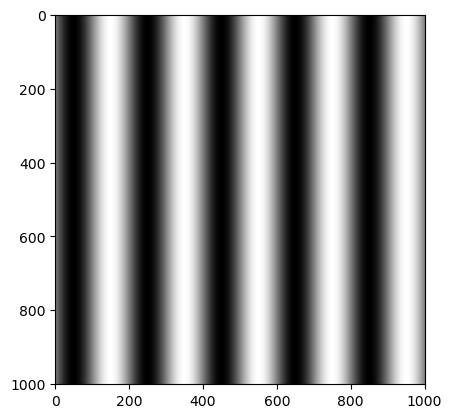

In [2]:
# gratings.py
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)  # creates a 2d coordinate grid
wavelength = 200

grating = np.sin(2 * np.pi * X / wavelength)

plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

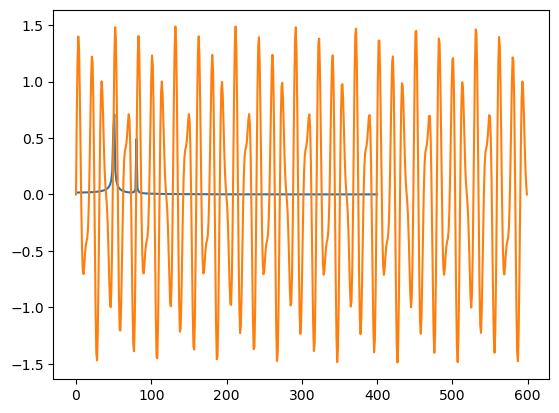

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600

# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.plot(y)
plt.show()
   

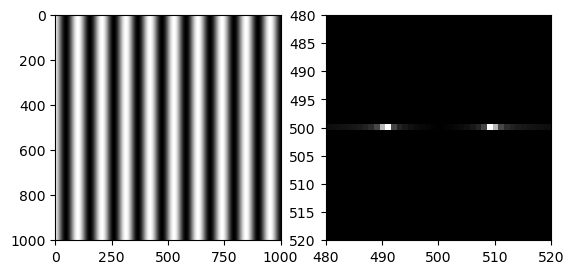

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 100
angle = np.pi/9

grating = np.sin(
    #2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
    2*np.pi*(X*np.cos(angle)) / wavelength
)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating)

# Calculate Fourier transform of grating - fft in numpy puts the zero frequency followed by positive frequencies, followed by negative frequencies
ft = np.fft.ifftshift(grating)  # shifts the zero-frequency component back to the beginning of the spectrum, restoring the original order
ft = np.fft.fft2(ft)  # computes the two-dimensional discrete Fourier Transform (DFT) using the Fast Fourier Transform (FFT)
ft = np.fft.fftshift(ft)  # shifts the zero-frequency component of a Fourier transform to the center: just moves the 2nd half of the data to the first half


plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

In [31]:
import os
import random

directory = r'C:\Users\bscho\Desktop\xfer gb'

gnames = ['Oliivia', 'Emmma', 'Ameliia', 'Charlottte', 'Miia', 'Sophia', 'Isabella', 'Evelynia', 'Aava', 
          'Sofiia', 'Camiila', 'Harpyr', 'Luuna', 'Eleeanora', 'Violett', 'Auroora']

for filename in os.listdir(directory):
    #print(filename, 'RG_' + random.choice(gnames), os.path.isfile(os.path.join(directory, filename)))
    print(filename, 'RG_' + random.choice(gnames) + '_' + filename.split(' ')[1], os.path.isfile(os.path.join(directory, filename)))
    #os.rename(filename, 'RG_' + random.choice(gnames) + '_' + filename.split(' ')[1])



ggg 0.jpg RG_Oliivia_0.jpg True
ggg 1.jpg RG_Camiila_1.jpg True
ggg 10.jpg RG_Harpyr_10.jpg True
ggg 11.jpg RG_Aava_11.jpg True
ggg 12.jpg RG_Ameliia_12.jpg True
ggg 13.jpg RG_Charlottte_13.jpg True
ggg 14.jpg RG_Evelynia_14.jpg True
ggg 15.jpg RG_Oliivia_15.jpg True
ggg 16.jpg RG_Auroora_16.jpg True
ggg 17.jpg RG_Oliivia_17.jpg True
ggg 18.jpg RG_Isabella_18.jpg True
ggg 19.jpg RG_Harpyr_19.jpg True
ggg 2.jpg RG_Isabella_2.jpg True
ggg 20.jpg RG_Ameliia_20.jpg True
ggg 21.jpg RG_Eleeanora_21.jpg True
ggg 22.jpg RG_Evelynia_22.jpg True
ggg 23.jpg RG_Violett_23.jpg True
ggg 24.jpg RG_Sophia_24.jpg True
ggg 25.jpg RG_Oliivia_25.jpg True
ggg 26.jpg RG_Charlottte_26.jpg True
ggg 27.jpg RG_Eleeanora_27.jpg True
ggg 28.jpg RG_Isabella_28.jpg True
ggg 29.jpg RG_Harpyr_29.jpg True
ggg 3.jpg RG_Auroora_3.jpg True
ggg 30.jpg RG_Oliivia_30.jpg True
ggg 31.jpg RG_Sophia_31.jpg True
ggg 32.jpg RG_Violett_32.jpg True
ggg 33.jpg RG_Miia_33.jpg True
ggg 34.jpg RG_Miia_34.jpg True
ggg 35.jpg RG_Emmma_3

In [30]:
import itertools
import numpy as np


a = [[0,0,0,1], [0,1,1,0], [1,1,0,0], [1,0,1,0]]

deletewhich = list(itertools.combinations('0123', 2))

a_del = a
for didxrow in deletewhich:
    a_del = np.delete(a_del, [int(d) for d in didxrow], 0)
    a_delrow = a_del
    for didxrow in deletewhich:
        a_del = np.delete(a_delrow, [int(d) for d in didxrow], 1)
        if np.sum(a_del) == 0:
            print(False)
        a_del = a_delrow
    a_del = a


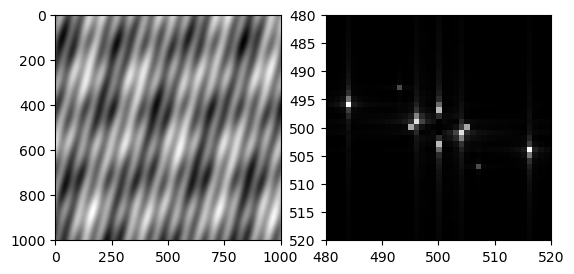

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12
gratings = np.zeros(X.shape)

for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / w_len
    )
    
# Calculate Fourier transform of the sum of the gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

Here's a clear toy example demonstrating the MLP (feedforward) component in transformers: This example demonstrates the key aspects of the transformer feedforward network:

**Key Points:**

1. **Two linear layers with expansion**: The first layer expands from `d_model` to `d_ff` (typically 4x larger), and the second projects back down

2. **Position-wise**: Each token position is processed independently - no mixing of information across the sequence

3. **Non-linearity**: GELU (or ReLU) activation between the layers provides the non-linear transformation

4. **Residual connection**: In a full transformer, this output would be added to the input (residual connection) and layer-normalized

The expansion to a higher dimension (`d_ff`) and back down allows the network to learn complex transformations while maintaining the same `d_model` dimension throughout the transformer stack.

In [20]:
import torch
import torch.nn as nn

class FeedForwardMLP(nn.Module):
    """
    The MLP/Feedforward network used between transformer blocks.
    
    Architecture:
    1. Linear projection to expand dimension (d_model -> d_ff)
    2. Non-linear activation (typically ReLU or GELU)
    3. Linear projection back down (d_ff -> d_model)
    4. Dropout for regularization (to prevent overfitting, effectively trains a large number of sub-networks -> more general)
    
    This is applied independently to each position.
    """
    def __init__(self, d_model, d_ff, dropout=0.1):
        super().__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.activation = nn.GELU()  # Can also use ReLU
        self.linear2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        # x shape: (batch_size, seq_len, d_model)
        x = self.linear1(x)      # -> (batch, seq_len, d_ff)
        x = self.activation(x)   # Apply non-linearity
        x = self.dropout(x)      # Regularization
        x = self.linear2(x)      # -> (batch, seq_len, d_model)
        return x


# Toy example with small dimensions
def main():
    # Hyperparameters (small for toy example)
    batch_size = 2
    seq_len = 4
    d_model = 8       # Model dimension (embedding size)
    d_ff = 32         # Hidden dimension (typically 4x d_model)
    
    # Create the feedforward network
    ffn = FeedForwardMLP(d_model, d_ff, dropout=0.1)
    
    # Create toy input (output from attention layer)
    # In practice, this comes from the multi-head attention
    x = torch.randn(batch_size, seq_len, d_model)
    
    print("Input shape:", x.shape)
    print("Input (first sequence, first token):\n", x[0, 0])
    print()
    
    # Forward pass through MLP
    output = ffn(x)
    
    print("Output shape:", output.shape)
    print("Output (first sequence, first token):\n", output[0, 0])
    print()
    
    # Key insight: Each position is processed independently
    # The FFN doesn't mix information across sequence positions
    print("="*60)
    print("Key property: Position-wise application")
    print("="*60)
    
    # Process positions separately to verify independence
    output_pos0 = ffn(x[:, 0:1, :])  # Process only position 0
    output_pos1 = ffn(x[:, 1:2, :])  # Process only position 1
    
    print("Processing position 0 separately:")
    print(output_pos0[0, 0, :3])  # First 3 values
    print("\nFrom full forward pass (position 0):")
    print(output[0, 0, :3])  # Should match!
    
    print("\n" + "="*60)
    print("Architecture summary:")
    print("="*60)
    print(f"d_model: {d_model} -> d_ff: {d_ff} -> d_model: {d_model}")
    print(f"Total parameters: {sum(p.numel() for p in ffn.parameters()):,}")
    print(f"  - W1: {d_model} x {d_ff} = {d_model * d_ff:,}")
    print(f"  - b1: {d_ff}")
    print(f"  - W2: {d_ff} x {d_model} = {d_ff * d_model:,}")
    print(f"  - b2: {d_model}")


if __name__ == "__main__":
    # Set seed for reproducibility
    torch.manual_seed(42)
    main()

Input shape: torch.Size([2, 4, 8])
Input (first sequence, first token):
 tensor([ 0.5163,  1.6060, -0.9815,  0.5361,  0.9226,  0.4872,  1.4920,  0.0133])

Output shape: torch.Size([2, 4, 8])
Output (first sequence, first token):
 tensor([-0.0074, -0.2296,  0.3912,  0.1630, -0.0833, -0.0522, -0.0185,  0.2283],
       grad_fn=<SelectBackward0>)

Key property: Position-wise application
Processing position 0 separately:
tensor([ 0.0810, -0.1133,  0.3722], grad_fn=<SliceBackward0>)

From full forward pass (position 0):
tensor([-0.0074, -0.2296,  0.3912], grad_fn=<SliceBackward0>)

Architecture summary:
d_model: 8 -> d_ff: 32 -> d_model: 8
Total parameters: 552
  - W1: 8 x 32 = 256
  - b1: 32
  - W2: 32 x 8 = 256
  - b2: 8


In [7]:


def pieceofpie(pie, n):
    return pie * n/100

p0 = 1
for p in range(15):
    p1 = pieceofpie(p0, p)
    p0 -= p1
    print(p, p1)

0 0.0
1 0.01
2 0.019799999999999998
3 0.029105999999999996
4 0.03764376
5 0.045172512
6 0.05149666368
7 0.0564746745024
8 0.060024511185408
9 0.06212536907689728
10 0.06281565095552948
11 0.06218749444597419
12 0.06037840369845494
13 0.05756074485919371
14 0.05392999018345995


Excellent — this gets to the **engineering and mathematical stability** that makes the Transformer architecture actually *trainable* and *deep*.

Let’s break this down clearly and precisely.

---

## 🧱 Transformer Block Recap

Each Transformer layer typically looks like this (in **Post-LN** form, the original Vaswani et al. 2017 version):

$y = x + \text{Attention}(\text{LayerNorm}(x))$

$z = y + \text{FFN}(\text{LayerNorm}(y))$

Or in **Pre-LN** form (used in most modern implementations for stability):

$y = x + \text{Attention}(\text{LayerNorm}(x))$

$z = y + \text{FFN}(\text{LayerNorm}(y))$

(Same structure, but normalization happens *before* each sublayer.)

---

## ⚙️ Purpose of Residual Connections

Residual (or *skip*) connections were first popularized by ResNet.
Their main purpose is to make **deep networks trainable** by preserving **gradient flow** and **semantic continuity** across layers.

### 1. **Gradient Flow Stabilization**

* Without residuals, deep layers can cause *vanishing/exploding gradients*.
* The skip path (`x + something`) creates a **direct gradient highway** from later to earlier layers:
  $
  \frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} (1 + \frac{\partial f(x)}{\partial x})
  $
  So even if the learned transformation (f(x)) collapses or saturates, the identity path keeps gradients alive.

### 2. **Preserve Information**

* The model can always “fall back” to the identity function if a sublayer learns nothing useful.
* This gives every layer a *safe baseline* to start from, enabling gradual improvement rather than catastrophic change.

### 3. **Eases Optimization**

* Each sublayer learns *residual refinements* rather than complete transformations.
* Instead of “learn the full mapping,” it’s “learn the small correction.”

So:

> **Residual connections make each layer a refinement, not a replacement, of its input.**

---

## ⚖️ Purpose of Layer Normalization

Layer Normalization (LN) stabilizes the activations within each token vector.

Given a token embedding $(x \in \mathbb{R}^{d})$:
$
\text{LN}(x) = \frac{x - \mu}{\sigma} \cdot \gamma + \beta
$
where $(\mu)$ and $(\sigma)$ are the mean and standard deviation over the token’s features.

### 1. **Prevents Internal Covariate Shift**

* Keeps activations on a stable scale and distribution as they pass through many layers.
* This means training dynamics don’t oscillate or blow up due to inconsistent activation scales.

### 2. **Improves Convergence Speed**

* By normalizing, the optimization surface becomes smoother → allows larger learning rates and faster convergence.

### 3. **Balances Attention and Feedforward Outputs**

* Since attention and MLP sublayers may output vectors with very different norms, LN ensures consistent scaling before residual addition.

---

## 💡 Combined Purpose: Residual + LN Together

| Mechanism               | Primary Role                         | Effect                                                     |
| ----------------------- | ------------------------------------ | ---------------------------------------------------------- |
| **Residual Connection** | Keep information & gradients flowing | Enables deep stacking and stable gradient propagation      |
| **Layer Normalization** | Keep activations numerically stable  | Prevents exploding/vanishing activations, smooths training |

Together they:

* Maintain a **consistent scale and signal path** through the entire Transformer.
* Allow extremely deep architectures (e.g., GPT-4, 100+ layers) to train stably.
* Enable **additive composition of knowledge** across layers — each layer makes a controlled refinement of the representation.

---

## 🧩 Conceptual Summary

You can think of it like this:

> The residual path is the **highway** that carries meaning forward,
> and the layer norm is the **traffic regulator** that keeps that flow smooth and stable.




**Key Features of a GPT-like transformer with hierarchical attention:**

1. **Two-Level Hierarchy:**
   - **Local attention**: Operates within small chunks (e.g., 4 tokens) to capture fine-grained patterns
   - **Global attention**: Operates between chunk representations to capture high-level structure


2. **How it works:**
   - Splits the sequence into chunks
   - Applies attention within each chunk independently
   - Pools chunks into single representations
   - Applies attention between these chunk representations
   - Broadcasts global context back to all tokens


3. **Benefits:**
   - More efficient than full attention (reduced computation)
   - Captures both local patterns and long-range dependencies
   - Mimics how language has hierarchical structure (words → phrases → sentences)


**The example includes:**
- A complete working transformer with hierarchical attention
- Causal masking for autoregressive generation
- A simple generation demo


You can modify `chunk_size` to control the granularity of the hierarchy. Smaller chunks = more local focus, larger chunks = more global processing per level.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class MultiHeadAttention(nn.Module):
    """Standard multi-head attention mechanism"""
    def __init__(self, d_model, n_heads):
        super().__init__()
        self.d_model = d_model
        self.n_heads = n_heads
        self.head_dim = d_model // n_heads
        
        self.q_proj = nn.Linear(d_model, d_model)
        self.k_proj = nn.Linear(d_model, d_model)
        self.v_proj = nn.Linear(d_model, d_model)
        self.out_proj = nn.Linear(d_model, d_model)
        
    def forward(self, x, mask=None):
        batch_size, seq_len, _ = x.shape
        
        # Project and reshape to (batch, n_heads, seq_len, head_dim)
        q = self.q_proj(x).view(batch_size, seq_len, self.n_heads, self.head_dim).transpose(1, 2)  # swap seconf and third dimension
        k = self.k_proj(x).view(batch_size, seq_len, self.n_heads, self.head_dim).transpose(1, 2)
        v = self.v_proj(x).view(batch_size, seq_len, self.n_heads, self.head_dim).transpose(1, 2)
        
        # Scaled dot-product attention
        scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.head_dim)  # transpose last two dimensions
        
        if mask is not None:
            scores = scores.masked_fill(mask == 0, float('-inf'))
        
        attn_weights = F.softmax(scores, dim=-1)
        attn_output = torch.matmul(attn_weights, v)
        
        # Reshape back
        attn_output = attn_output.transpose(1, 2).contiguous().view(batch_size, seq_len, self.d_model)
        return self.out_proj(attn_output)


class HierarchicalAttentionLayer(nn.Module):
    """
    Hierarchical attention that operates at two levels:
    1. Local attention within chunks (low-level patterns)
    2. Global attention between chunk representations (high-level structure)
    """
    def __init__(self, d_model, n_heads, chunk_size=4):
        super().__init__()
        self.d_model = d_model
        self.chunk_size = chunk_size
        
        # Local attention within chunks
        self.local_attn = MultiHeadAttention(d_model, n_heads)
        
        # Global attention between chunks
        self.global_attn = MultiHeadAttention(d_model, n_heads)
        
        # Pooling to create chunk representations
        self.chunk_pool = nn.Linear(d_model, d_model)
        
        # Expand chunk representation back to tokens
        self.chunk_expand = nn.Linear(d_model, d_model)
        
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        
    def forward(self, x, mask=None):
        batch_size, seq_len, d_model = x.shape
        
        # Pad sequence to be divisible by chunk_size
        pad_len = (self.chunk_size - seq_len % self.chunk_size) % self.chunk_size
        if pad_len > 0:
            x = F.pad(x, (0, 0, 0, pad_len))
            if mask is not None:
                mask = F.pad(mask, (0, pad_len, 0, pad_len))
        
        padded_len = x.shape[1]
        n_chunks = padded_len // self.chunk_size
        
        # === Level 1: Local attention within chunks ===
        # Reshape to (batch * n_chunks, chunk_size, d_model)
        x_chunks = x.view(batch_size, n_chunks, self.chunk_size, d_model)
        x_chunks = x_chunks.view(batch_size * n_chunks, self.chunk_size, d_model)
        
        # Apply local attention
        local_out = self.local_attn(x_chunks)
        local_out = self.norm1(x_chunks + local_out)
        
        # Reshape back
        local_out = local_out.view(batch_size, n_chunks, self.chunk_size, d_model)
        
        # === Level 2: Create chunk representations ===
        # Pool each chunk to a single vector (mean pooling)
        chunk_repr = local_out.mean(dim=2)  # (batch, n_chunks, d_model)
        chunk_repr = self.chunk_pool(chunk_repr)
        
        # === Level 3: Global attention between chunks ===
        global_out = self.global_attn(chunk_repr)
        global_out = self.norm2(chunk_repr + global_out)
        
        # === Level 4: Broadcast chunk context back to tokens ===
        # Expand chunk representations back to all tokens in each chunk
        global_expanded = global_out.unsqueeze(2).expand(-1, -1, self.chunk_size, -1)
        global_expanded = global_expanded.reshape(batch_size, padded_len, d_model)
        global_expanded = self.chunk_expand(global_expanded)
        
        # Combine local and global information
        local_flat = local_out.view(batch_size, padded_len, d_model)
        output = self.norm3(local_flat + global_expanded)
        
        # Remove padding
        if pad_len > 0:
            output = output[:, :-pad_len, :]
        
        return output


class HierarchicalTransformer(nn.Module):
    """Simple GPT-like transformer with hierarchical attention"""
    def __init__(self, vocab_size, d_model=128, n_heads=4, n_layers=3, 
                 chunk_size=4, max_seq_len=64):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoding = nn.Embedding(max_seq_len, d_model)
        
        # Stack of hierarchical attention layers
        self.layers = nn.ModuleList([
            HierarchicalAttentionLayer(d_model, n_heads, chunk_size)
            for _ in range(n_layers)
        ])
        
        self.output_proj = nn.Linear(d_model, vocab_size)
        
    def forward(self, x):
        batch_size, seq_len = x.shape
        
        # Embeddings
        positions = torch.arange(seq_len, device=x.device).unsqueeze(0).expand(batch_size, -1)
        x = self.embedding(x) + self.pos_encoding(positions)
        
        # Create causal mask for autoregressive generation
        mask = torch.triu(torch.ones(seq_len, seq_len, device=x.device), diagonal=1)
        mask = mask.masked_fill(mask == 1, float('-inf')).masked_fill(mask == 0, 1.0)
        mask = mask.unsqueeze(0).unsqueeze(0)  # (1, 1, seq_len, seq_len)
        
        # Apply hierarchical attention layers
        for layer in self.layers:
            x = layer(x, mask)
        
        # Project to vocabulary
        logits = self.output_proj(x)
        return logits


# === Example Usage ===
if __name__ == "__main__":
    # Hyperparameters
    vocab_size = 1000
    batch_size = 2
    seq_len = 16
    
    # Create model
    model = HierarchicalTransformer(
        vocab_size=vocab_size,
        d_model=128,
        n_heads=4,
        n_layers=3,
        chunk_size=4,  # Process text in chunks of 4 tokens
        max_seq_len=64
    )
    
    # Create sample input (random token IDs)
    input_ids = torch.randint(0, vocab_size, (batch_size, seq_len))
    
    # Forward pass
    logits = model(input_ids)
    
    print(f"Input shape: {input_ids.shape}")
    print(f"Output shape: {logits.shape}")
    print(f"\nModel has {sum(p.numel() for p in model.parameters()):,} parameters")
    
    # Demonstrate generation
    print("\n=== Example Generation ===")
    with torch.no_grad():
        # Start with a sequence
        generated = input_ids[0:1, :4]  # Take first 4 tokens
        print(f"Starting sequence: {generated.tolist()[0]}")
        
        # Generate next 8 tokens
        for _ in range(8):
            logits = model(generated)
            next_token = logits[:, -1, :].argmax(dim=-1, keepdim=True)
            generated = torch.cat([generated, next_token], dim=1)
        
        print(f"Generated sequence: {generated.tolist()[0]}")

Input shape: torch.Size([2, 16])
Output shape: torch.Size([2, 16, 1000])

Model has 762,856 parameters

=== Example Generation ===
Starting sequence: [484, 915, 371, 116]
Generated sequence: [484, 915, 371, 116, 493, 770, 74, 164, 968, 892, 968, 258]


A **Convolutional Network (ConvNet or CNN)** is a class of deep neural networks primarily designed to process data with a known grid-like topology, such as images (2D grid of pixels) or time-series data (1D grid). 🖼️
The core idea is to automatically and efficiently learn spatial hierarchies of features from the raw input data.

Key Components and Concepts
CNNs gain their power from three types of specialized layers:

1. **Convolutional Layer (The Core)**
This layer applies a learnable set of filters (also called kernels) across the input image.
- Filter (Kernel): A small matrix (e.g., 3x3) that slides over the input (a process called convolution).
- Feature Mapping: At each location, the filter computes a dot product between its values and the corresponding values of the input. This result is stored in an output structure called a feature map.
- Feature Learning: Different filters learn to recognize different basic features, such as edges, textures, or corners, regardless of where they appear in the image (this is called translation invariance).

3. **Pooling Layer (Downsampling)**
This layer systematically reduces the spatial size (width and height) of the feature maps, which serves two main purposes:
- Reduces Complexity: Lowers the number of parameters and computation in the network.
- Increases Robustness: Makes the model less sensitive to minor shifts or distortions in the input image.
- Max Pooling: The most common form, which takes the maximum value from a small window (e.g., 2x2) in the feature map.


5. **Fully Connected (FC) Layer (Classification)**
After several stacked Conv and Pooling layers have extracted high-level features, the feature maps are flattened into a single vector. This vector is then fed into one or more standard fully connected layers, which perform the final classification (e.g., determining if the image is a cat, dog, or bird).

In [398]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# --- 1. Define the CNN Architecture (The Model) ---
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # 1. Convolutional Layer 1
        # Input: 1 channel (grayscale), Output: 32 feature maps, 3x3 kernel
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)

        # 2. Convolutional Layer 2
        # Input: 32 feature maps, Output: 64 feature maps, 3x3 kernel
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # 3. Pooling Layer
        # Reduces spatial size (2x2 window)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # 4. Fully Connected (Dense) Layer
        # The size 7*7*64 comes from:
        # 28x28 (input) -> 14x14 (after pool1) -> 7x7 (after pool2) * 64 channels
        self.fc1 = nn.Linear(7 * 7 * 64, 128)

        # 5. Output Layer (10 classes for digits 0-9)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Apply Conv1 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv1(x)))

        # Apply Conv2 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten the feature maps for the Dense layers
        x = x.view(-1, 7 * 7 * 64)

        # Apply FC1 -> ReLU
        x = F.relu(self.fc1(x))

        # Output Layer (No softmax here; it's usually included in the loss function in PyTorch)
        x = self.fc2(x)
        return x

# --- 2. Data Loading and Preprocessing ---
# Define a standard transformation: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # Standard MNIST mean and std
])

# Download and load the datasets
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Create DataLoaders (for batching and shuffling)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# --- 3. Model Initialization, Loss, and Optimizer ---
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 5

# --- 4. Training Loop ---
print("Starting PyTorch CNN Training...")
for epoch in range(1, epochs + 1):
    model.train() # Set the model to training mode
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass: compute predicted outputs
        output = model(data)

        # Calculate the loss
        loss = criterion(output, target)

        # Backward pass: compute gradient of the loss w.r.t model parameters
        loss.backward()

        # Update the parameters
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

# --- 5. Evaluation Loop ---
model.eval() # Set the model to evaluation mode
test_loss = 0
correct = 0
with torch.no_grad(): # Disable gradient calculations during evaluation
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset) / 1000 # Correct average loss calculation

print("-" * 35)
print(f"Test Set Results:")
print(f"Average Loss: {test_loss:.4f}")
print(f"Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.2f}%)")

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 10214828.67it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 271850.95it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 2677371.44it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 998769.46it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Starting PyTorch CNN Training...
Epoch 1/5, Loss: 0.1287
Epoch 2/5, Loss: 0.0426
Epoch 3/5, Loss: 0.0297
Epoch 4/5, Loss: 0.0224
Epoch 5/5, Loss: 0.0173
-----------------------------------
Test Set Results:
Average Loss: 0.0296
Accuracy: 9905/10000 (99.05%)


Key PyTorch Components
torch.nn.Module: All PyTorch models inherit from this base class. The constructor (__init__) defines the layers, and the forward method defines how data flows through the network.

nn.Conv2d: The convolutional layer. It expects input in the shape (Batch_Size, Channels, Height, Width).

nn.MaxPool2d: The pooling layer for downsampling features.

nn.Linear: A standard fully connected (dense) layer.

F.relu: The ReLU activation function from the functional API (torch.nn.functional).

x.view(-1, ...): This is the PyTorch equivalent of Flattening. It reshapes the 4D tensor (from Conv/Pool) into a 2D tensor (Batch_Size, Feature_Vector_Length) where -1 automatically infers the batch size.

torch.no_grad(): Used during evaluation to save memory and computations by ensuring no gradients are calculated, as they aren't needed for prediction.

## Mixture-of-Experts (MoE) Architecture

The Mixture-of-Experts (MoE) Architecture is a neural network design that replaces a standard, monolithic feed-forward layer with a sparsely activated system of multiple, smaller expert networks. This allows models to scale up the number of parameters significantly without proportionally increasing the computational cost (FLOPs) during training or inference. 🚀

Core Concept: Divide and Conquer

In a traditional large language model (LLM) Transformer block, every input token goes through the same feed-forward network. In an MoE layer, this process is replaced:
* **Gate (Router) Network**: A small neural network (or linear layer) determines which of the multiple experts should process the current input token. It outputs a probability distribution over the experts.
* **Sparse Activation**: Crucially, the gate is typically configured to select and activate only a sparse subset of the experts (e.g., the top 1 or top 2 experts) for any given input token.
* **Experts**: These are independent, specialized feed-forward networks (MLPs). Each chosen expert processes the input, and its output is weighted by the probability assigned by the gate.
* **Output Combination**: The outputs from the selected experts are combined (usually by a weighted sum) to form the final output of the MoE layer.

The benefit is computational efficiency: a model might have billions of parameters across dozens of experts, but only a small fraction of those parameters are used for any single input, making the model faster and cheaper to run than a dense model of comparable size.

Key References

The concept of MoE dates back to the early 1990s, but its modern large-scale application in Transformer models is credited to the following key papers:
* Jacobs, R. A., Jordan, M. I., Nowlan, S. J., & Hinton, G. E. (1991). Adaptive mixtures of local experts. Neural computation.
Focus: The foundational work introducing the Mixture-of-Experts idea with a routing mechanism, initially applied to regression.
* Shazeer, N., Mirhoseini, A., Maziarz, K., Davis, A., Le, Q., Chen, W., ... & Dean, J. (2017). Outrageously large neural networks: The sparsely-gated Mixture-of-Experts layer. International Conference on Learning Representations (ICLR).
Focus: The modern, large-scale application of MoE to sequence-to-sequence models, demonstrating massive parameter counts (trillions) with efficient sparsity. This paper showed how to make the gating mechanism differentiable and scalable.
* Lepikhin, T., Xu, H., Chen, Y., Schoppe, E., Roberts, A., Lee, J., ... & Shazeer, N. (2021). GShard: Scaling Giant Models with Conditional Computation and Automatic Sharding. International Conference on Machine Learning (ICML).
Focus: Further scaling the MoE approach by integrating it into the Transformer's feed-forward layers and demonstrating its effectiveness in achieving state-of-the-art results for machine translation, setting the stage for models like GPT-4 and Google's Gemini.


In a standard Transformer, every token in a sequence passes through the exact same Feed-Forward Network (FFN) weights. In a Mixture-of-Experts (MoE) architecture, we replace that static FFN with a "Sparse MoE" layer.

Think of it like a specialized medical clinic: instead of every patient seeing the same general practitioner, a "Router" (triage nurse) looks at the patient's symptoms and sends them to the specific specialist (Expert) best equipped to help.

Key Components of MoE
- **Experts**: Multiple independent FFN layers.
- **Router**: A gate that decides which experts should handle which tokens.
- **Top-k Gating**: The router usually selects only the top 1 or 2 experts to save computation.

Python Toy Example (PyTorch)
This example demonstrates a single MoE layer where we have 4 experts, but only the top 2 are activated for any given token.

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Expert(nn.Module):
    """A simple Feed-Forward Network, which acts as one 'Expert'."""
    def __init__(self, d_model, d_hidden):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_model, d_hidden),
            nn.ReLU(),
            nn.Linear(d_hidden, d_model)
        )

    def forward(self, x):
        return self.net(x)

class SparseMoE(nn.Module):
    def __init__(self, d_model, d_hidden, num_experts, top_k):
        super().__init__()
        self.num_experts = num_experts
        self.top_k = top_k
        self.router = nn.Linear(d_model, num_experts)
        self.experts = nn.ModuleList([Expert(d_model, d_hidden) for _ in range(num_experts)])

    def forward(self, x):
        batch_size, seq_len, d_model = x.shape
        # Flatten to (Total Tokens, d_model)
        tokens_flat = x.view(-1, d_model) 
        
        # 1. Get Router Logits (the raw, unnormalized scores produced by the final layer of the network before any activation function is applied)
        router_logits = self.router(tokens_flat) 
        
        # 2. Get Top-K Experts and Weights
        # weights: (apply activation to Total Tokens, top_k), indices: (Total Tokens, top_k) - and only take the top k
        weights, indices = torch.topk(F.softmax(router_logits, dim=-1), self.top_k, dim=-1)
        
        # Re-normalize weights so they sum to 1 for the selected experts
        weights = weights / weights.sum(dim=-1, keepdim=True)
        
        # 3. Prepare output buffer
        final_output = torch.zeros_like(tokens_flat)
        
        # 4. Computation Loop
        # We iterate through the k-selection for each token
        for i in range(tokens_flat.shape[0]):  # for each token...
            for k in range(self.top_k):  # ...get the opinion of each of the top k experts
                expert_idx = indices[i, k].item()
                expert_weight = weights[i, k]
                
                # FIX: We use tokens_flat[i] to get a (d_model,) shape
                # The expert returns (d_model,), so we can add it to final_output[i]
                token_input = tokens_flat[i] 
                expert_output = self.experts[expert_idx](token_input)
                
                final_output[i] += expert_weight * expert_output

        # Reshape back to (Batch, Seq_Len, d_model)
        return final_output.view(batch_size, seq_len, d_model)

# --- TESTING THE TOY MODEL ---
d_model = 8
num_experts = 4
top_k = 2  # Only 2 experts will work on any single token

moe_layer = SparseMoE(d_model=d_model, d_hidden=64, num_experts=num_experts, top_k=top_k)

# Dummy input: 1 sequence of 3 tokens
dummy_input = torch.randn(1, 3, d_model)
output = moe_layer(dummy_input)

print(f"Input Shape: {dummy_input.shape} {dummy_input}")
print(f"Output Shape: {output.shape} {output}")

Input Shape: torch.Size([1, 3, 8]) tensor([[[ 0.0965,  0.4851, -1.6768, -1.6473,  0.0893, -0.8206,  1.2879,
           0.6151],
         [ 0.0986, -0.5430,  0.9061,  1.6658, -1.1153, -0.6689, -0.8854,
          -0.0414],
         [ 2.8377,  0.2332,  1.1891,  0.4375, -0.0548,  0.2415,  1.3099,
           1.9125]]])
Output Shape: torch.Size([1, 3, 8]) tensor([[[-0.0363,  0.1013, -0.1097, -0.4793,  0.1758, -0.1461,  0.2252,
          -0.1717],
         [ 0.1957,  0.1098, -0.2356, -0.1530, -0.0275, -0.0710,  0.0901,
          -0.1493],
         [-0.1049,  0.2001, -0.2217, -0.1295, -0.0180, -0.5038,  0.0714,
          -0.3138]]], grad_fn=<ViewBackward0>)


I'll add a comprehensive training routine to your Sparse Mixture of Experts code. This will include a simple language modeling task to demonstrate how to train the MoE layer.I've added a complete training routine to your Sparse MoE code! Here's what I included:

**New Components:**

1. **SimpleTransformerWithMoE**: A minimal transformer model that incorporates your MoE layer with embeddings, positional encoding, and an output projection layer

2. **SimpleTextDataset**: A synthetic dataset generator for language modeling tasks (you can replace this with real text data)

3. **train_moe_model()**: The main training function that handles:
   - Model optimization with Adam
   - Cross-entropy loss for next-token prediction
   - Progress tracking and loss reporting
   - Batch processing

**Key Features:**

- Uses next-token prediction as the training objective (standard for language models)
- Includes GPU support (automatically uses CUDA if available)
- Has residual connections and layer normalization for stable training
- Prints detailed training progress every 20 batches
- Tests inference after training

You can customize the hyperparameters in the main section (vocabulary size, model dimensions, number of experts, etc.) or replace the synthetic dataset with real text data for more meaningful training. The code is ready to run as-is for demonstration purposes!

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class Expert(nn.Module):
    """A simple Feed-Forward Network, which acts as one 'Expert'."""
    def __init__(self, d_model, d_hidden):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_model, d_hidden),
            nn.ReLU(),
            nn.Linear(d_hidden, d_model)
        )
    def forward(self, x):
        return self.net(x)

class SparseMoE(nn.Module):
    def __init__(self, d_model, d_hidden, num_experts, top_k):
        super().__init__()
        self.num_experts = num_experts
        self.top_k = top_k
        self.router = nn.Linear(d_model, num_experts)
        self.experts = nn.ModuleList([Expert(d_model, d_hidden) for _ in range(num_experts)])
    
    def forward(self, x):
        batch_size, seq_len, d_model = x.shape
        tokens_flat = x.view(-1, d_model) 
        
        router_logits = self.router(tokens_flat) 
        weights, indices = torch.topk(F.softmax(router_logits, dim=-1), self.top_k, dim=-1)
        weights = weights / weights.sum(dim=-1, keepdim=True)
        
        final_output = torch.zeros_like(tokens_flat)
        
        for i in range(tokens_flat.shape[0]):
            for k in range(self.top_k):
                expert_idx = indices[i, k].item()
                expert_weight = weights[i, k]
                token_input = tokens_flat[i] 
                expert_output = self.experts[expert_idx](token_input)
                final_output[i] += expert_weight * expert_output
        
        return final_output.view(batch_size, seq_len, d_model)

class SimpleTransformerWithMoE(nn.Module):
    """A simple transformer block with MoE for demonstration."""
    def __init__(self, vocab_size, d_model, d_hidden, num_experts, top_k, max_seq_len=128):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_embedding = nn.Embedding(max_seq_len, d_model)
        self.moe_layer = SparseMoE(d_model, d_hidden, num_experts, top_k)
        self.output_proj = nn.Linear(d_model, vocab_size)
        self.layer_norm = nn.LayerNorm(d_model)
        
    def forward(self, x):
        batch_size, seq_len = x.shape
        positions = torch.arange(seq_len, device=x.device).unsqueeze(0).expand(batch_size, -1)
        
        x = self.embedding(x) + self.pos_embedding(positions)
        x = self.layer_norm(x)
        x = x + self.moe_layer(x)  # Residual connection
        x = self.layer_norm(x)
        logits = self.output_proj(x)
        
        return logits

class SimpleTextDataset(Dataset):
    """Simple dataset for language modeling."""
    def __init__(self, num_samples=1000, seq_len=32, vocab_size=100):
        self.num_samples = num_samples
        self.seq_len = seq_len
        self.vocab_size = vocab_size
        # Generate synthetic data (random sequences)
        self.data = torch.randint(0, vocab_size, (num_samples, seq_len))
    
    def __len__(self):
        return self.num_samples
    
    def __getitem__(self, idx):
        return self.data[idx]

def train_moe_model(
    model, 
    train_loader, 
    num_epochs=5, 
    learning_rate=0.001,
    device='cpu'
):
    """Training routine for the MoE model."""
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    
    print("Starting training...")
    print(f"Device: {device}")
    print(f"Number of epochs: {num_epochs}")
    print("-" * 50)
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        num_batches = 0
        
        for batch_idx, batch in enumerate(train_loader):
            batch = batch.to(device)
            
            # Create input and target (predict next token)
            input_seq = batch[:, :-1]
            target_seq = batch[:, 1:]
            
            # Forward pass
            logits = model(input_seq)
            
            # Reshape for loss calculation
            logits_flat = logits.reshape(-1, logits.size(-1))
            target_flat = target_seq.reshape(-1)
            
            # Calculate loss
            loss = criterion(logits_flat, target_flat)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            num_batches += 1
            
            if (batch_idx + 1) % 20 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], "
                      f"Batch [{batch_idx+1}/{len(train_loader)}], "
                      f"Loss: {loss.item():.4f}")
        
        avg_loss = total_loss / num_batches
        print(f"Epoch [{epoch+1}/{num_epochs}] Complete - Average Loss: {avg_loss:.4f}")
        print("-" * 50)
    
    print("Training complete!")
    return model

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    # Set random seed for reproducibility
    torch.manual_seed(42)
    
    # Check if GPU is available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Hyperparameters
    vocab_size = 100
    d_model = 64
    d_hidden = 128
    num_experts = 4
    top_k = 2
    seq_len = 32
    batch_size = 16
    num_epochs = 5
    learning_rate = 0.001
    
    # Create model
    print("Initializing model...")
    model = SimpleTransformerWithMoE(
        vocab_size=vocab_size,
        d_model=d_model,
        d_hidden=d_hidden,
        num_experts=num_experts,
        top_k=top_k,
        max_seq_len=seq_len
    )
    
    print(f"Model has {sum(p.numel() for p in model.parameters())} parameters")
    print("-" * 50)
    
    # Create dataset and dataloader
    print("Creating dataset...")
    dataset = SimpleTextDataset(num_samples=1000, seq_len=seq_len, vocab_size=vocab_size)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    # Train the model
    trained_model = train_moe_model(
        model=model,
        train_loader=train_loader,
        num_epochs=num_epochs,
        learning_rate=learning_rate,
        device=device
    )
    
    # Test inference
    print("\nTesting inference...")
    trained_model.eval()
    with torch.no_grad():
        test_input = torch.randint(0, vocab_size, (1, seq_len - 1)).to(device)
        test_output = trained_model(test_input)
        print(f"Input shape: {test_input.shape}")
        print(f"Output shape: {test_output.shape}")
        print(f"Sample predictions: {test_output[0, :3].argmax(dim=-1)}")

Initializing model...
Model has 81640 parameters
--------------------------------------------------
Creating dataset...
Starting training...
Device: cpu
Number of epochs: 5
--------------------------------------------------
Epoch [1/5], Batch [20/63], Loss: 4.7282
Epoch [1/5], Batch [40/63], Loss: 4.7093
Epoch [1/5], Batch [60/63], Loss: 4.7159
Epoch [1/5] Complete - Average Loss: 4.7268
--------------------------------------------------
Epoch [2/5], Batch [20/63], Loss: 4.6449
Epoch [2/5], Batch [40/63], Loss: 4.6369
Epoch [2/5], Batch [60/63], Loss: 4.6375
Epoch [2/5] Complete - Average Loss: 4.6373
--------------------------------------------------
Epoch [3/5], Batch [20/63], Loss: 4.5863
Epoch [3/5], Batch [40/63], Loss: 4.6317
Epoch [3/5], Batch [60/63], Loss: 4.6056
Epoch [3/5] Complete - Average Loss: 4.5969
--------------------------------------------------
Epoch [4/5], Batch [20/63], Loss: 4.5932
Epoch [4/5], Batch [40/63], Loss: 4.5802
Epoch [4/5], Batch [60/63], Loss: 4.5770

In [5]:
test_input

tensor([[19, 99,  3, 34, 66, 91, 29, 46, 48, 51, 82, 38, 59, 32, 21, 37, 98, 64,
         76, 43, 91, 52, 25, 19, 91,  1, 57, 95, 56, 35, 65]])

In [6]:
test_output

tensor([[[-0.0135, -0.0247, -0.1167,  ...,  0.4989,  0.1807,  0.0791],
         [ 0.1988, -0.1019,  0.3690,  ...,  0.0251, -0.2450,  0.8358],
         [-0.2278,  0.5394, -0.0216,  ..., -0.1335,  0.2927,  0.2550],
         ...,
         [ 0.2314, -0.7570,  0.6863,  ..., -0.1572,  0.2677, -0.2366],
         [-0.5502, -0.2216, -0.2589,  ..., -0.1206,  0.7398, -0.8679],
         [-0.4200, -0.0887, -0.3098,  ..., -0.1450, -0.1050,  0.0070]]])

## Neuro-Symbolic Integration and Active Learning
    
Neuro-Symbolic Integration is an approach in Artificial Intelligence that aims to combine the strengths of two historically separate paradigms: neural (connectionist) networks and symbolic (logic-based) AI. 🧠 💡

The goal is to create more robust, transparent, and generalizable AI systems by melding the capabilities of each:

| Paradigm | Strengths (Contribution to the Hybrid) | Weaknesses (Addressed by the Hybrid) |
| --- | --- | --- |
| Neural (Deep Learning) | Perception & Learning: Excellent at pattern recognition, handling noisy data, and learning complex features from raw data (e.g., images, text). | Reasoning & Explanation: Poor at logical deduction, high-level planning, and providing transparent, step-by-step explanations. |  
| Symbolic (Logic & Rules) | Reasoning & Knowledge: Excellent at representing explicit knowledge, performing logical inference, and ensuring results adhere to known rules. | Perception & Robustness: Poor at learning from raw data, handling uncertainty, and adapting to novel, unseen inputs. |






**Integration Approaches**

Neuro-Symbolic AI attempts to bridge this gap, typically using one of the following main styles:
* Symbolic-Guided Neural Networks: The symbolic component (e.g., a knowledge graph or a set of logical rules) is used to constrain or guide the training of a neural network, ensuring the network's predictions adhere to known facts or logical consistency.
* Neural-Guided Symbolic Reasoning: The neural network component processes raw data (e.g., an image) and translates it into a structured, symbolic representation (e.g., "There is a cat and a dog in the image"). This symbolic output is then passed to a traditional reasoning system to perform complex deduction.
* End-to-End Hybrid Models: The two components operate simultaneously, often iteratively passing information back and forth. For example, a neural network proposes a solution, which a symbolic module verifies and refines based on logical constraints.

The ultimate aim of Neuro-Symbolic AI is to achieve the human-like ability to seamlessly switch between intuitive pattern recognition and deliberate, logical thought.
   
Here are a few key references for Neuro-Symbolic Integration (NSI), covering its foundational concepts and modern applications:

**Foundational Concepts and Early Work**
* Valiant, L. G. (1994). A theory of the learnable. Communications of the ACM, 37(11), 113-122.
Focus: Though broad, Valiant's work on "Neuroidal" computation (a hybrid of neural and logical processing) is often cited as a conceptual precursor to modern NSI, arguing for systems that are both robust (like neural nets) and able to perform logical reasoning.

**Key Modern Frameworks**
* Besold, T. R., P. Moeller, M. P. G. Moos, & U. Schmid (2017). Neural-Symbolic Learning and Reasoning: A Survey and Perspective. In European Conference on Cognitive Modelling (ECCM).
Focus: A comprehensive survey that categorized various NSI approaches, clearly outlining the challenges and future directions for the field.
* Garnelo, M., & Shanahan, M. (2019). Relational Deep Learning. Foundations and Trends in Machine Learning, 12(4), 329-457.
Focus: Discusses methods for integrating relational structures (symbolic concepts) into deep learning, particularly relevant to Neural-Symbolic reasoning on structured data like graphs.

**Modern Practical Applications (Deep Learning Era)**
* Manhaeve, R., Dumančić, S., Kimmig, A., & De Raedt, L. (2018). DeeProblog: Differentiable Probabilistic Logic Programming. Advances in Neural Information Processing Systems (NeurIPS).
Focus: A prominent example of symbolic-guided neural networks. DeeProblog shows how to embed differentiable neural components into a probabilistic logic programming framework, allowing for end-to-end learning that respects logical constraints.
* Mao, J., Gan, C., Kohli, P., Tenenbaum, J. B., & Wu, J. (2019). The Neuro-Symbolic Concept Learner. International Conference on Learning Representations (ICLR).
Focus: A successful demonstration of neural-guided symbolic reasoning in computer vision. It uses a neural perception module to parse images into symbolic representations, which are then processed by a symbolic reasoning engine to answer complex visual questions.


## Predictive and Generative World Models

World Models in AI are internal, learned simulations or representations of an agent's environment, inspired by human cognition. These models allow an agent (especially in Reinforcement Learning, or RL) to anticipate outcomes, plan future actions, and even learn complex tasks entirely within the simulated world, sometimes referred to as "dreaming."

The architecture of a World Model often consists of two key components that perform Predictive and Generative functions.

**Brief Description**

**Predictive World Models (Forward Models)**
The primary role of the predictive component is to act as a forward model, forecasting the next state of the environment given the current state and a potential action.
Function: Given $s_t$ (current state) and $a_t$ (action), it predicts $s_{t+1}$ (next state) and $r_{t+1}$ (next reward).
Goal: To learn the dynamics and transition probabilities of the environment.
Benefit: Enables planning; the agent can mentally "roll out" sequences of actions within the model to evaluate a policy before executing them in the real world, saving time and resources.

**Generative World Models**
The generative component focuses on creating and reconstructing the observations or states of the environment, often operating on a compressed, latent space representation.
Function:
Compression (Encoder/Vision Model): Converts high-dimensional input (like raw image pixels) into a low-dimensional, compressed latent vector ($z_t$).
Generation (Decoder): Reconstructs the original high-dimensional observation from the latent vector.
Goal: To provide a robust, compact, and essential representation of the state for the predictive model and the policy. It is often responsible for generating the "dream" environment for internal training.
In the most successful architectures, a deep learning agent uses the Generative model to encode the sensory input ($V$) and the Predictive model to forecast the future in the compact latent space ($M$), while a small Controller ($C$) learns the optimal actions using these internal representations.

**Key References**

**Foundational World Model Architecture**:
Ha, D., & Schmidhuber, J. (2018). World Models. arXiv preprint arXiv:1803.10122.
Significance: The seminal paper that popularized the modern, tripartite World Model architecture (Vision/Encoder, Memory/Predictor, Controller) and famously showed an agent could be trained entirely inside its simulated "dream" environment.

**Advanced Model-Based RL**:
Hafner, D., Lillicrap, T., Fischer, I., Villegas, R., Wierstra, D., & Chen, R. (2019). Dreamer: Learning Behavior from High-Dimensional Observations with Deep Reinforcement Learning. International Conference on Learning Representations (ICLR).
Significance: Introduced Dreamer, a highly successful framework that refined the World Model approach, enabling efficient learning in complex, high-dimensional visual environments by training an agent using imagined latent trajectories. Successive versions (DreamerV2, V3) further improved performance.

**Early Vision and Prediction**:
Lotter, W., Kreiman, G., & Cox, D. (2016). Deep Predictive Coding Networks for Video Prediction and Unsupervised Learning. International Conference on Learning Representations (ICLR).
Significance: Explored Predictive Coding, a concept inspired by neuroscience where the brain constantly tries to predict the next sensory input and only propagates the prediction error. This idea is a core mechanism in predictive world models.